## Timeline plots

In [10]:
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
import numpy as np
import pandas as pd
fp2 = FontProperties(fname=r"../fonts/Font Awesome 5 Free-Solid-900.otf")

magenta_light = (1,0,1)
magenta_dark = (0.5,0,0.5)
green_light = (0, 0.5, 0)
green_dark = (0, 0.3, 0)
dark_grey = (0.3, 0.3, 0.3)

cm_plot_style = [("\uf0c0", green_light), #Public Outdoor Gathering Person Limit
                 ("\uf500", magenta_light), #Public Indoor Gathering Person Limit
                 ("\uf500", green_light), #'Private Outdoor Gathering Person Limi
                 ("\uf0c0", magenta_light), #Private Indoor Gathering Person Limit
                 ("\uf0c0", green_dark), #Public Outdoor Household Limit'
                 ("\uf0c0", magenta_dark), # 'Public Indoor Household Limit
                 ("\uf500", green_dark), #'Private Outdoor Household Limi
                 ("\uf500", magenta_dark), # 'Private Indoor Household Limit',f500 dark
                 ("\ue063", dark_grey), #'Mandatory Mask Wearing', e063
                 ("\uf54f", (0.7,0.7,0.7)), # 'Some Face-to-Face Businesses Closed', f54f light
                 ("\uf2e7", dark_grey), #'Gastronomy Closed', f2e7
                 ("\uf44b", dark_grey), #'Leisure Venues Closed', f44b
                 ("\uf290", dark_grey), #'Retail Closed', f290
                 ("\uf54f", dark_grey), #'All Face-to-Face Businesses Closed', f54f dark
                 ("\uf015", dark_grey), #'Stay at Home Order', f015
                 ("\uf017", dark_grey), #'Curfew', f017
                 ("\uf77c", dark_grey), #'Childcare Closed', f77c
                 ("\uf549", (0.7,0.7,0.7)), #'Primary Schools Closed', f549, colour
                 ("\uf549", dark_grey), #'Secondary Schools Closed', f549, colour
                 ("\uf19c", dark_grey) #'Universities Away'], f549
]
# plt.text(np.re, y, cm_plot_style[val][0], horizontalalignment='center', verticalalignment='center',
#                        fontproperties=fp2, fontsize=10, color=col)
df = pd.read_csv('../data/all_merged_data.csv')
CMs = df.columns[5:]
local_areas = np.unique(df['Area'])
active_CMs = np.load('../data/active_cms.npy', allow_pickle=True)
days = list(pd.to_datetime(df['Date'][df['Area'] == local_areas[0]]).dt.date)

In [11]:
def add_cms_to_plot(ax, ActiveCMs, area_indx, min_x, max_x, days, plot_style, plot_reopenings=True):
    """
    Plotter helper.
    This takes a plot and adds NPI logos on them.
    :param ax: axis to draw
    :param ActiveCMs: Standard ActiveCMs numpy array
    :param country_indx: Country to pull CM data from
    :param min_x: x limit - left
    :param max_x: x limit - right
    :param days: days to plot
    :param plot_style: NPI Plot style
    """
    ax2 = ax.twinx()
    plt.ylim([0, 1])
    plt.xlim([min_x, max_x])
    CMs = ActiveCMs[area_indx, :, :]
    nCMs, _ = CMs.shape
    CM_changes = np.zeros((nCMs, len(days)))
    CM_changes[:, 1:] = CMs[:, 1:] - CMs[:, :-1]
    all_CM_changes = np.sum(CM_changes, axis=0)
    all_heights = np.zeros(all_CM_changes.shape)
    for cm in range(nCMs):
        changes = np.nonzero(CM_changes[cm, :])[0].tolist()
        height = 1
        for c in changes:
            close_heights = all_heights[c - 3:c + 4]
            if len(close_heights) == 7:
                height = np.max(close_heights) + 1
                all_heights[c] = height
            plt.plot(
                [c, c],
                [0, 1],
                "--",
                color="lightgrey",
                linewidth=1,
                zorder=-2,
                alpha=0.7
            )
            plot_height = 1 - (0.05 * height)
            if c < min_x:
                c_p = min_x
            else:
                c_p = c
            if CM_changes[cm, c] == 1:
                plt.text(c_p, plot_height, plot_style[cm][0], fontproperties=fp2, color=plot_style[cm][1], size=15,
                         va='center', ha='center', clip_on=True, zorder=1)
            elif plot_reopenings:
                plt.text(c_p, plot_height, plot_style[cm][0], fontproperties=fp2, color=plot_style[cm][1], size=15,
                         va='center', ha='center', clip_on=True, zorder=1)
                plt.plot([c_p - 3, c + 3], [plot_height - 0.01, plot_height + 0.01], color="black", zorder=2)
    plt.yticks([])
    return ax2


In [12]:
# active_CMs_country = np.array(active_CMs[country_ind] > 0).astype(int)
uk_Rs = ['Lincolnshire', 'Greater Manchester South West',
       'Redbridge and Waltham Forest', 'Enfield', 'Buckinghamshire CC',
       'Portsmouth', 'Southampton', 'Brighton and Hove', 'Coventry',
       'Walsall', 'North Yorkshire CC', 'Essex Haven Gateway',
       'Southend-on-Sea', 'Gloucestershire', 'East Derbyshire']
at_Rs = ['Wien', 'Burgenland', 'Steiermark', 'Oberösterreich',
       'Nieder­österreich', 'Voralberg ', 'Tirol', 'Karnten/Carinthia',
       'Salzburg']
de_Rs = ['Nürnberg', 'LK Aschaffenburg', 'Fürth', 'Landsberg am Lech',
       'LK Donau-Ries', 'Minden-Lübbecke', 'Mönchengladbach', 'Münster',
       'Rhein-Kreis Neuss', 'LK Ennepe-Ruhr-Kreis', 'LK Rems-Murr-Kreis',
       'LK Breisgau-Hochschwarzwald', 'LK Enzkreis', 'LK Hildesheim',
       'LK Gifhorn']
it_Rs = ['Abruzzo', 'Aosta Valley', 'Apulia (AKA Puglia)','Basilicata','Calabria','Campania','Emilia-Romagna',
        'Friuli-Venezia Giulia','Lazio','Liguria ','Lombardy','Marche','Molise','Piedmont','Sardinia','Sicily',
         'Trentino (aka Trento)', 'South Tyrol (aka Bolzano aka Alto-Adige)', 'Tuscania ','Umbria','Veneto']

In [13]:
def plot_timeline_region(region, active_CMs_country, Rs):
    region_index = Rs.index(region)
    cases_data = df['New Cases'][df['Area']==region]
    deaths_data = df['New Deaths'][df['Area']==region]

    fig = plt.figure(figsize=((20,8)))
    ax1 = fig.add_subplot(1, 2, 1)
    ax1.plot(range(len(days)), cases_data, label = 'New Cases', alpha=0.4)
    ax2 = fig.add_subplot(1, 2, 2)
    ax2.plot(range(len(days)), deaths_data, label = 'New Deaths', alpha=0.4, color='red')

    add_cms_to_plot(ax1, active_CMs_country, region_index, min_x = 0, max_x = 162, days=days, plot_style = cm_plot_style, plot_reopenings=True);
    plt.xticks([i*30 for i in range(6)], [days[i*30] for i in range(6)])
    plt.title("Timeline plot for "+region+", overlayed with new cases (blue)")

    add_cms_to_plot(ax2, active_CMs_country, region_index, min_x = 0, max_x = 162, days=days, plot_style = cm_plot_style, plot_reopenings=True);
    plt.xticks([i*30 for i in range(6)], [days[i*30] for i in range(6)])
    plt.title("Timeline plot for "+region+", overlayed with new deaths (red)")

def plot_timeline_country(country_index, Rs):
    active_CMs_country = np.array(active_CMs[country_index] > 0).astype(int)
    for region in Rs:
        plot_timeline_region(region, active_CMs_country, Rs)

def plot_definitions():
    fig = plt.figure(figsize=((10,10)))
    plt.ylim([0, 45])
    plt.xlim([0, 5])
    nCMs = len(CMs)
    plot_height = 43
    for cm in range(nCMs):
        c = 0.5
        plt.text(c, plot_height, cm_plot_style[cm][0], fontproperties=fp2, color=cm_plot_style[cm][1], size=15,
                     va='center', ha='center', clip_on=True, zorder=1)
        plt.text(c+0.5, plot_height-0.3, CMs[cm], fontsize=10)
        plot_height = plot_height -2
    plt.yticks([])
    plt.xticks([])

/home/charlie/.cache/pypoetry/virtualenvs/covid19npisecondwave-rNDyq_Fa-py3.8/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 57443 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/charlie/.cache/pypoetry/virtualenvs/covid19npisecondwave-rNDyq_Fa-py3.8/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 57443 missing from current font.
  font.set_text(s, 0, flags=flags)


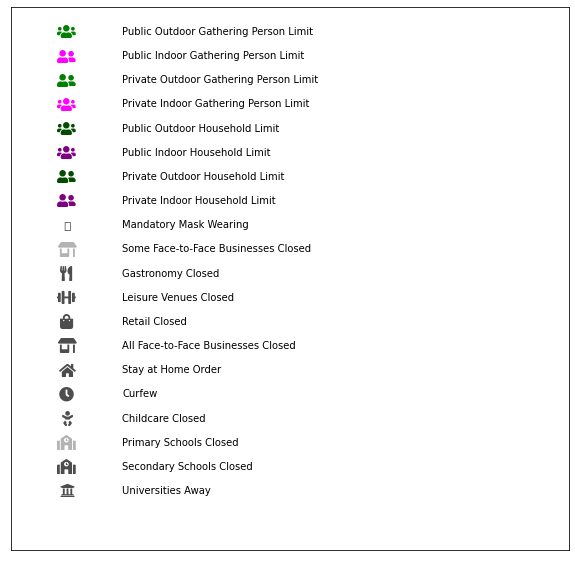

In [14]:
plot_definitions()

## England

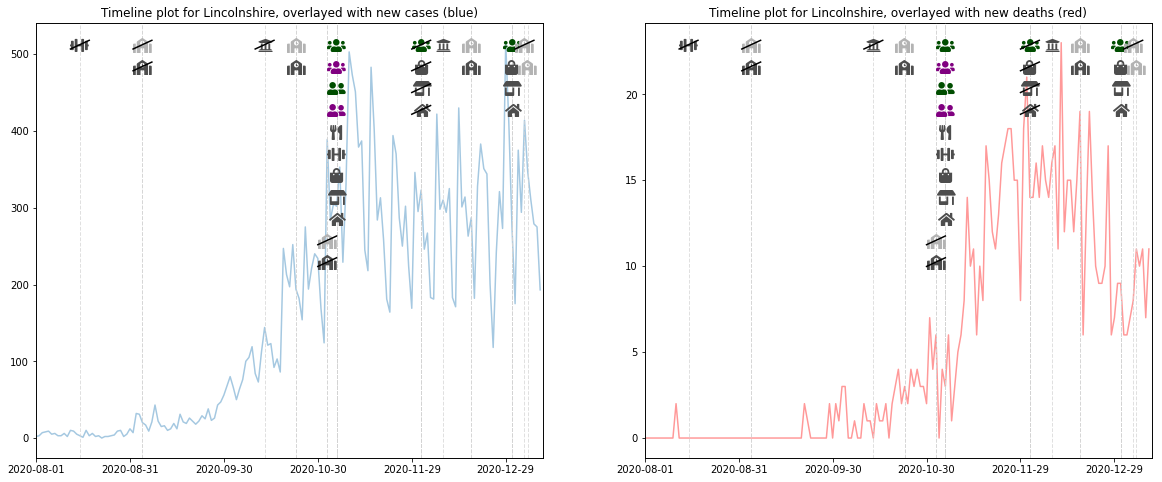

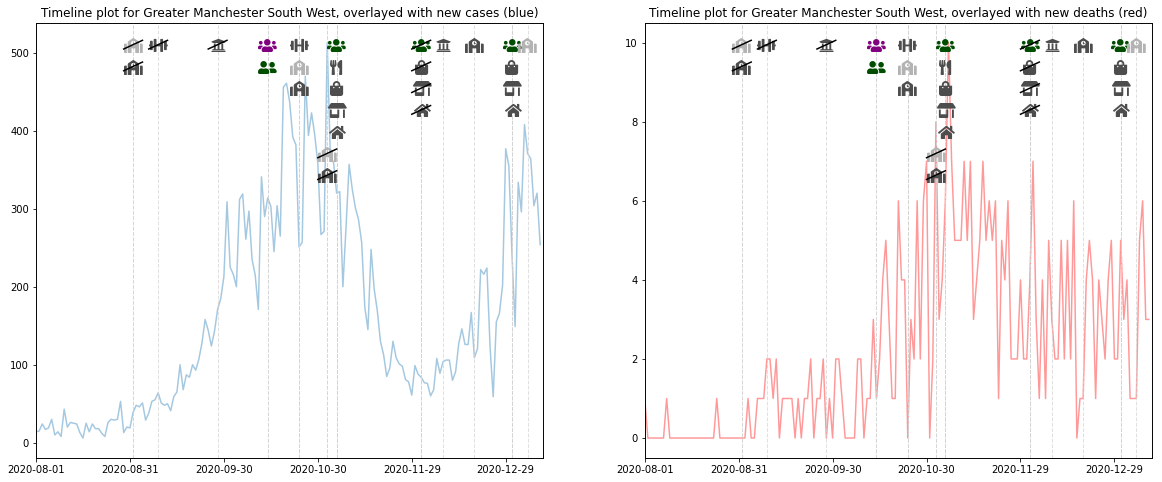

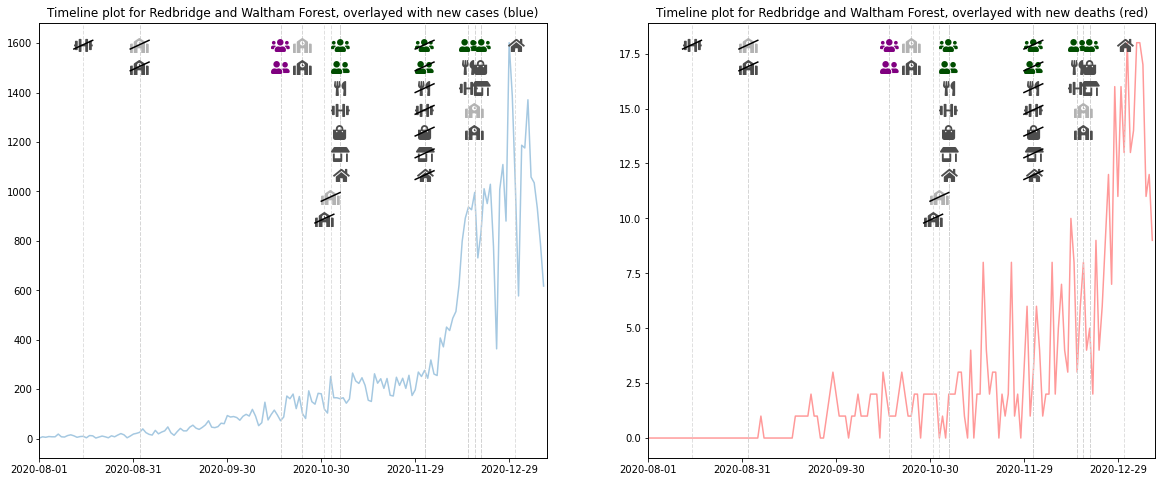

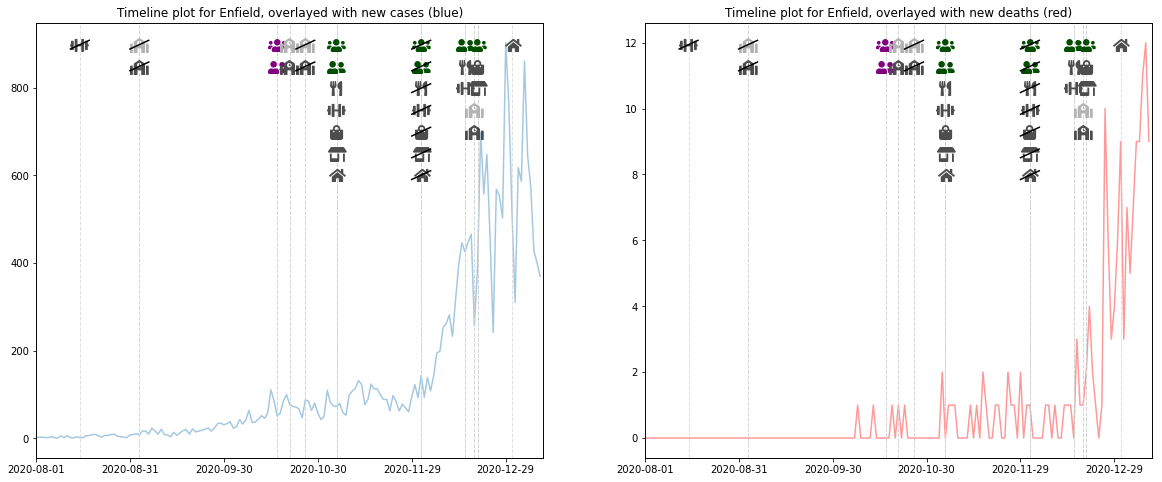

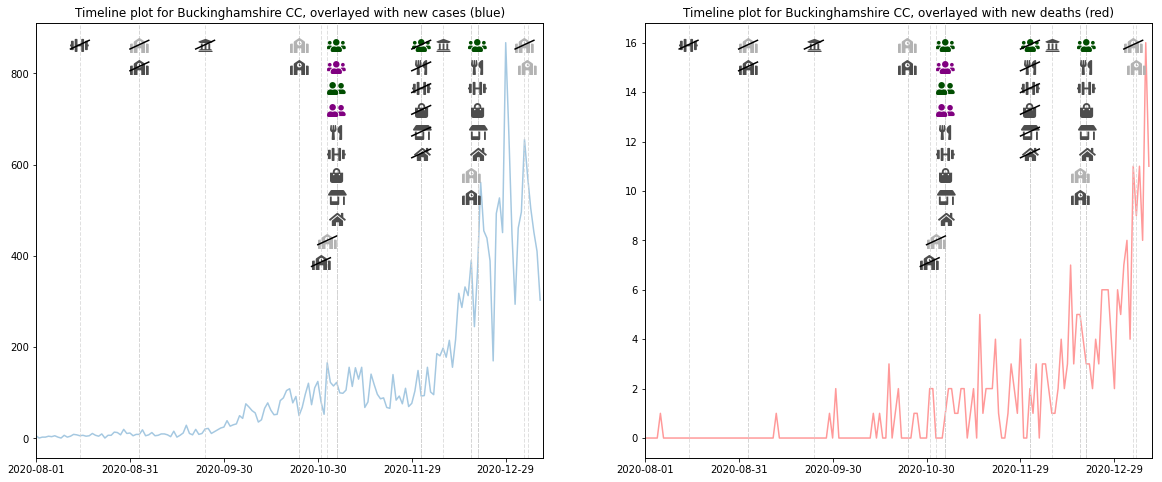

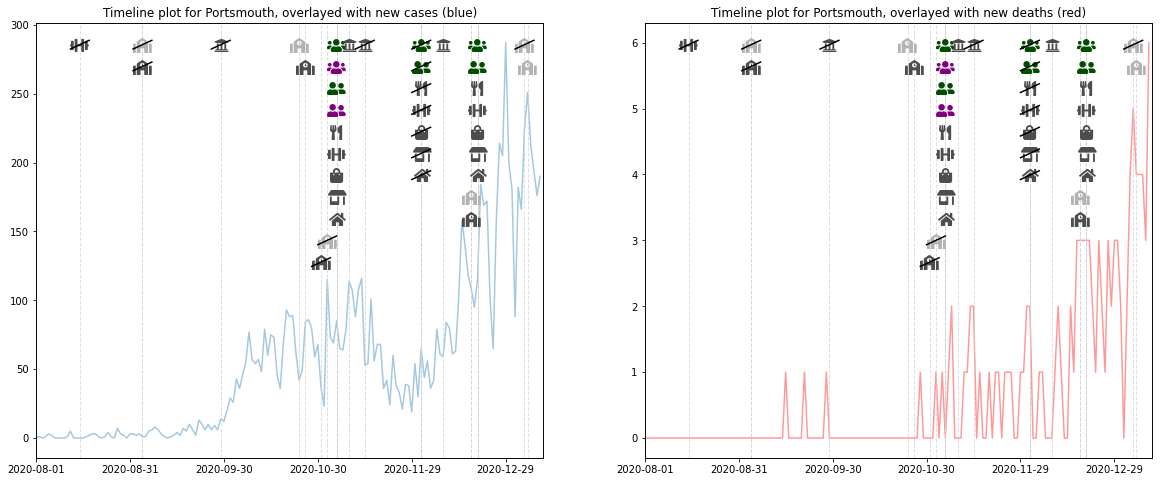

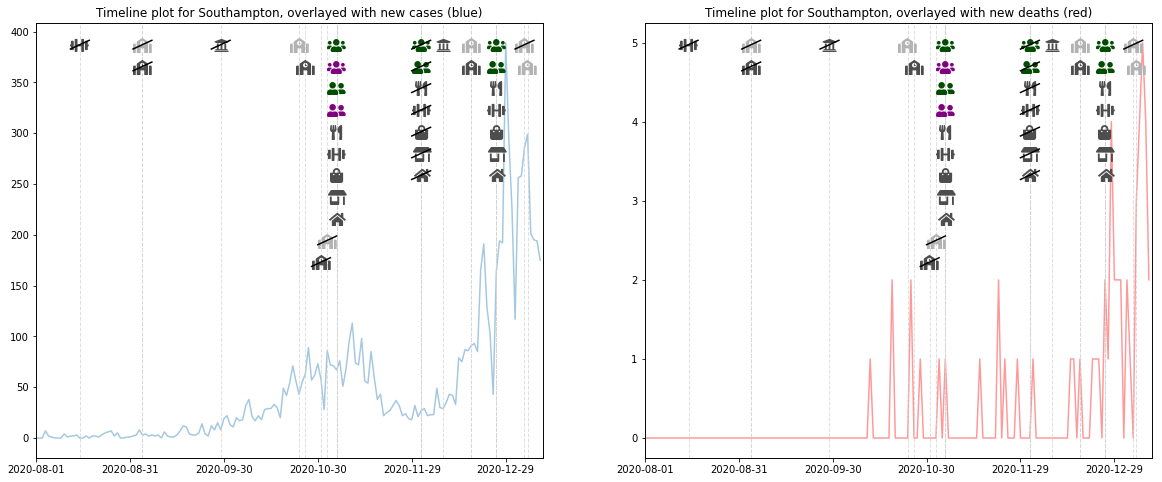

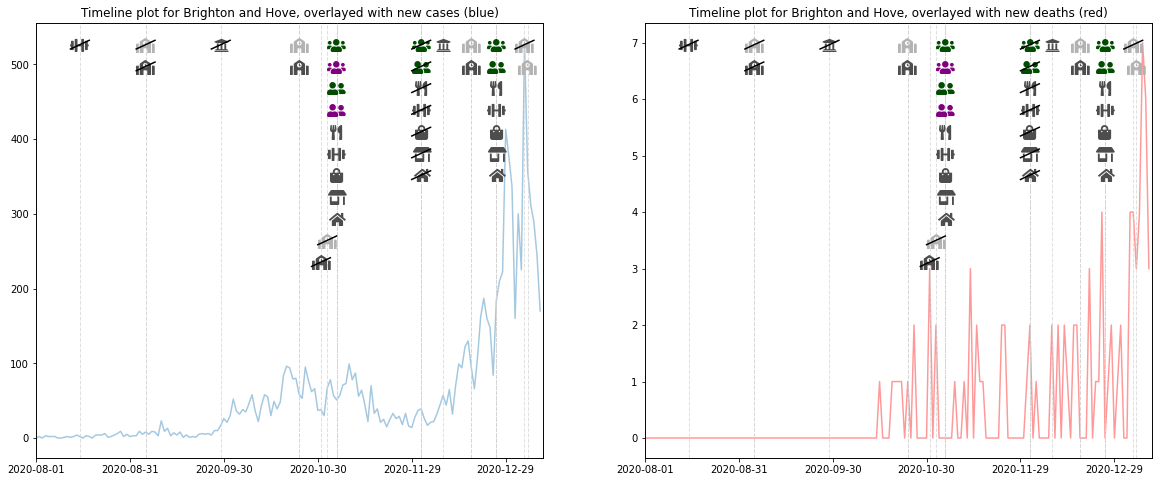

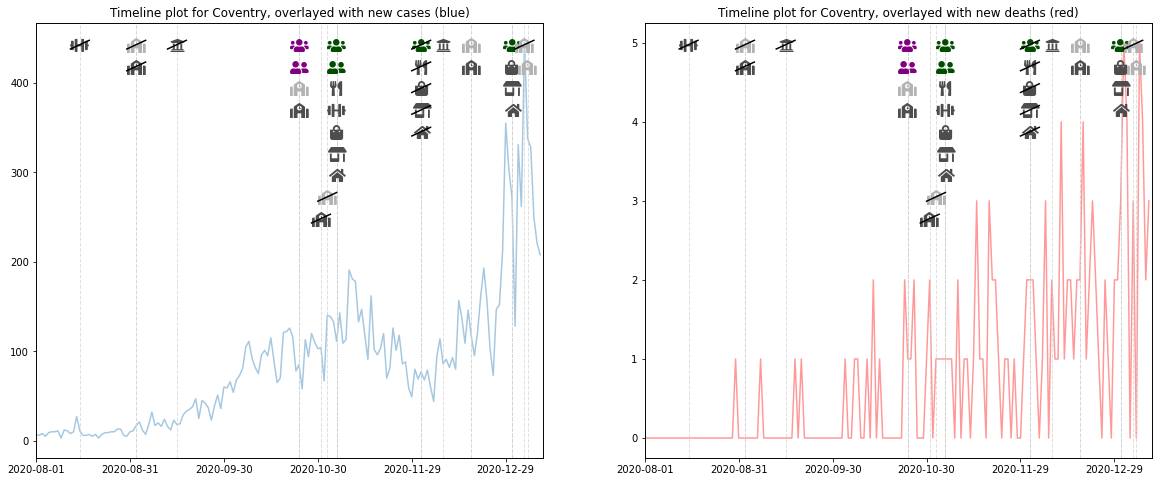

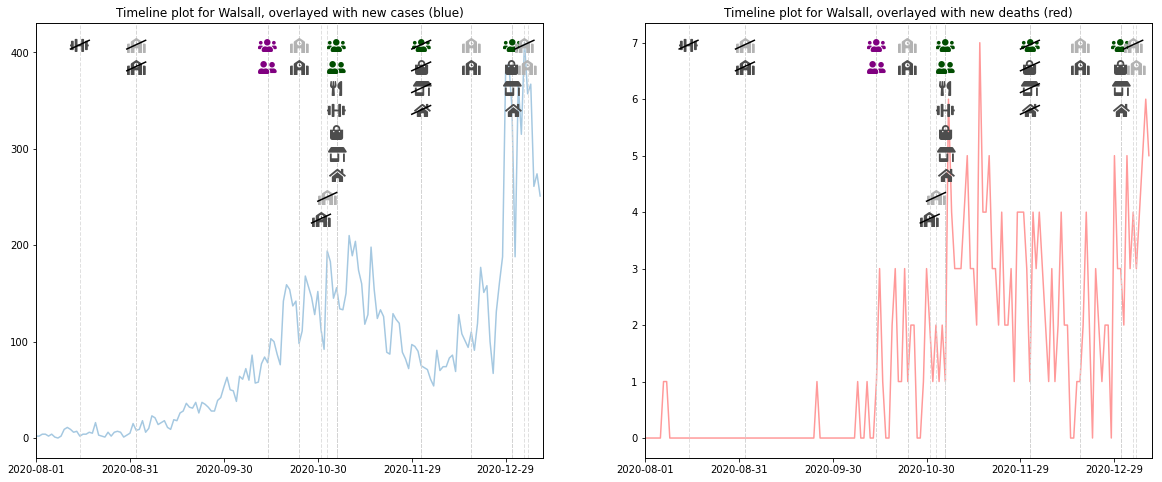

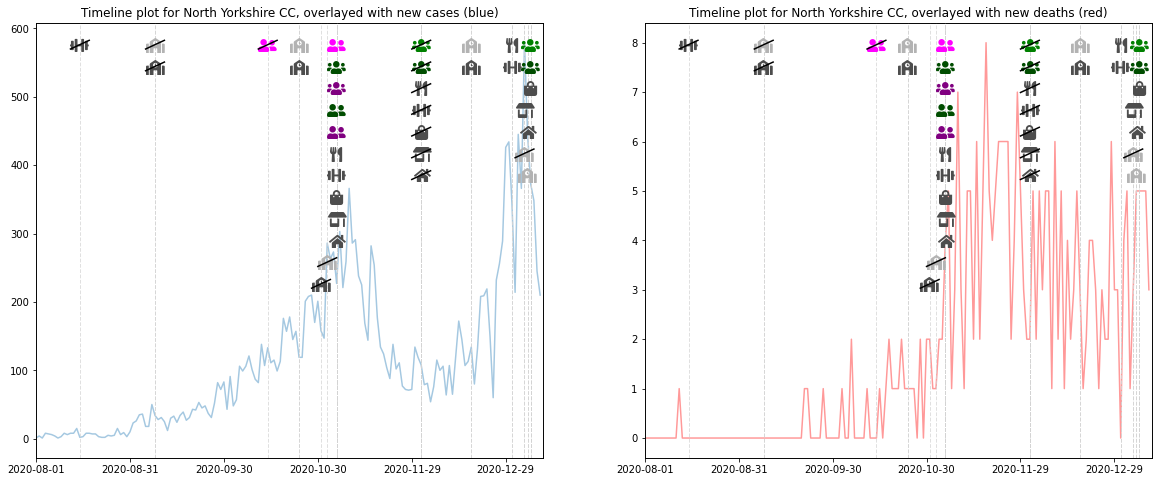

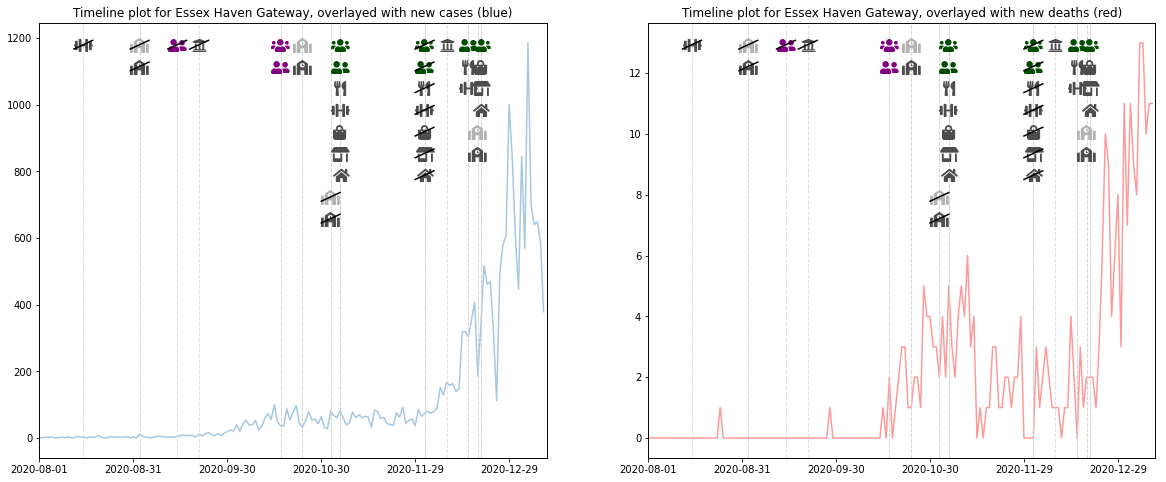

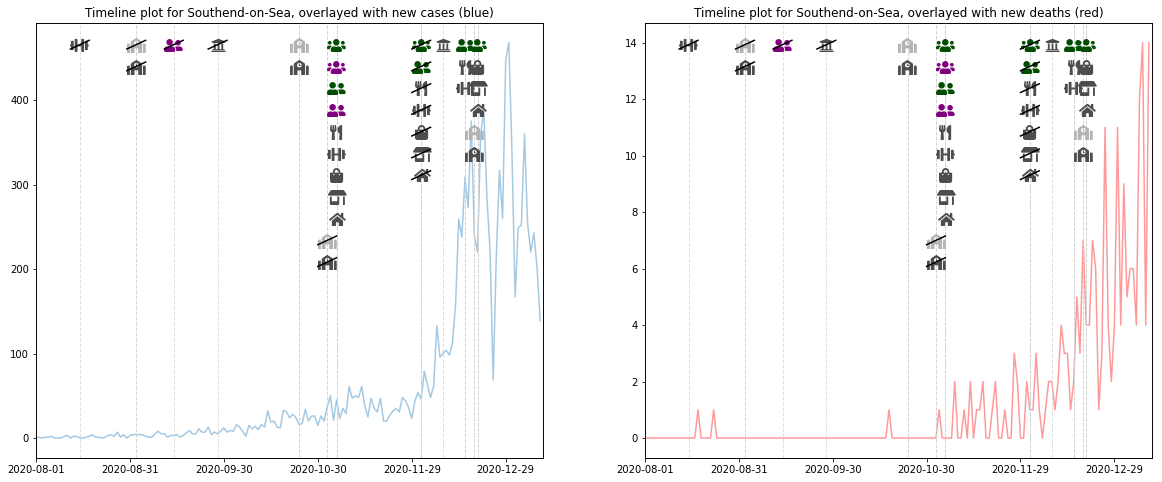

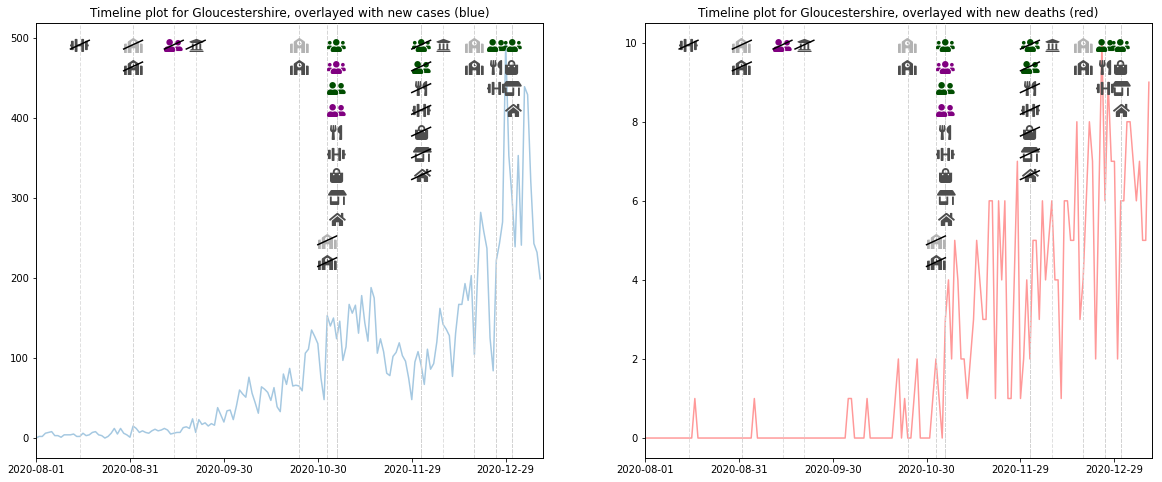

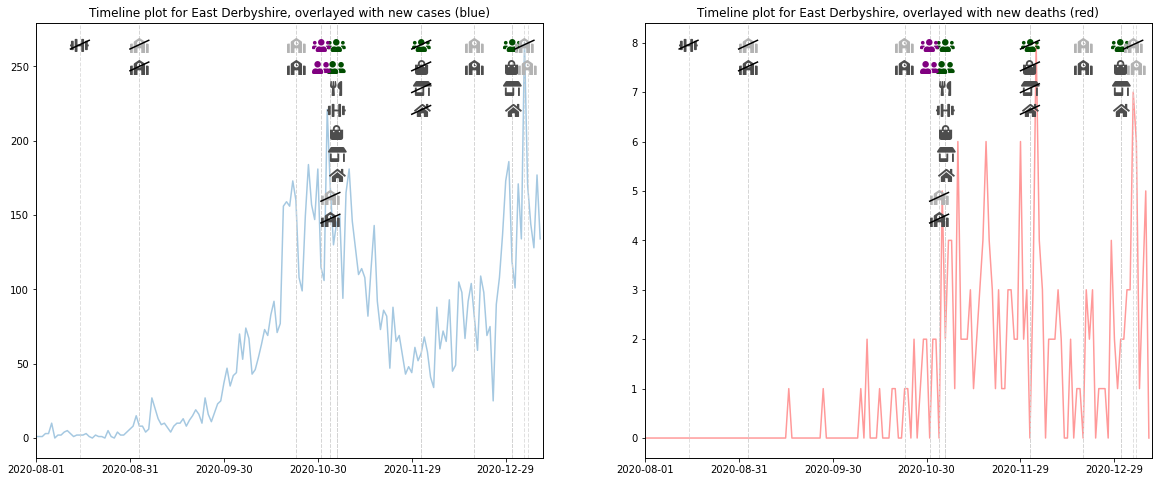

In [15]:
plot_timeline_country(0, uk_Rs)

## Austria

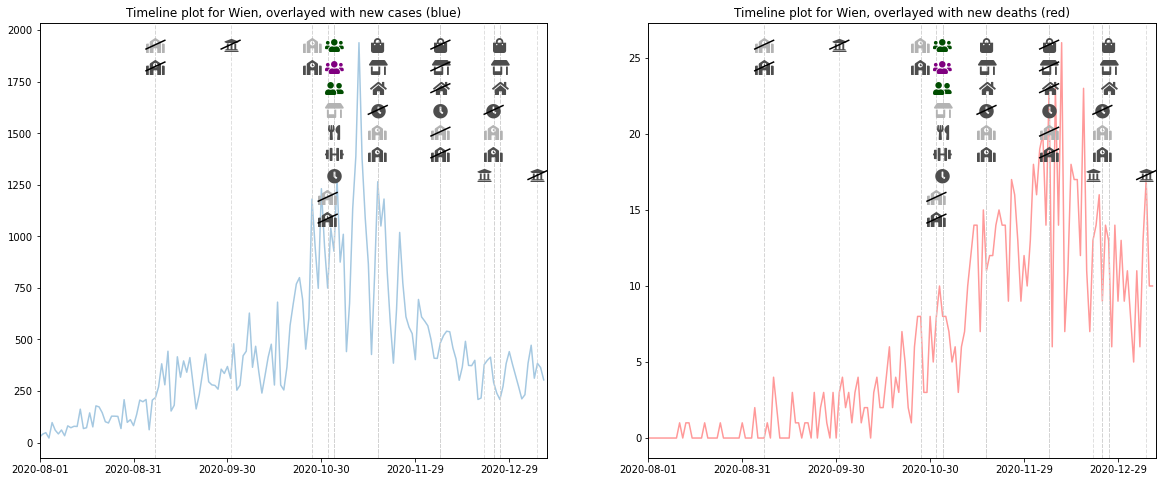

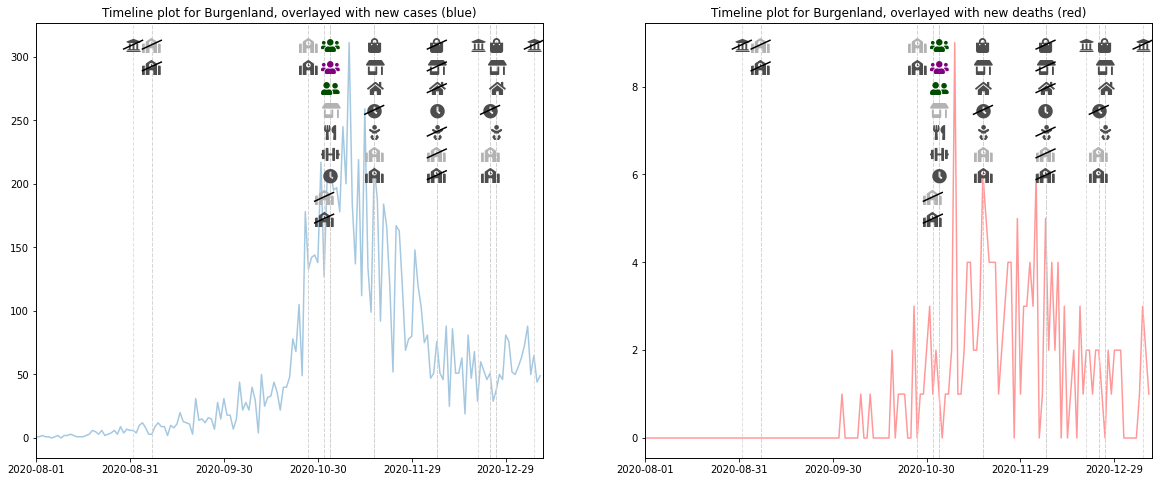

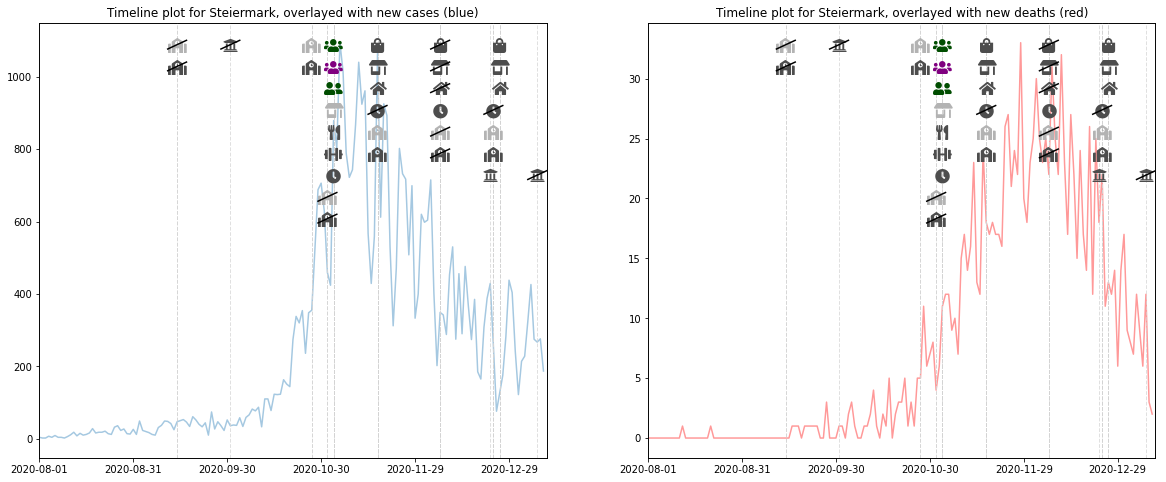

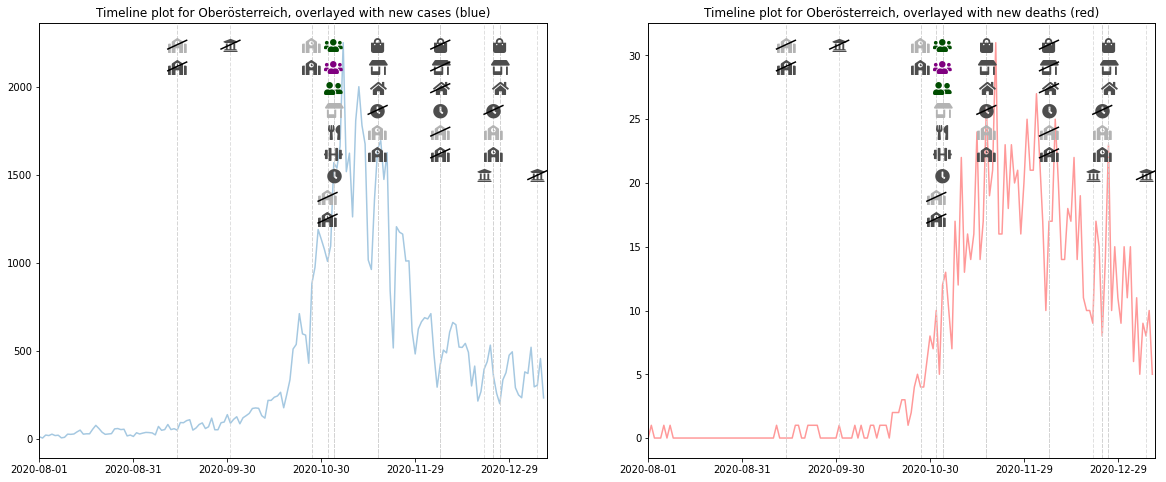

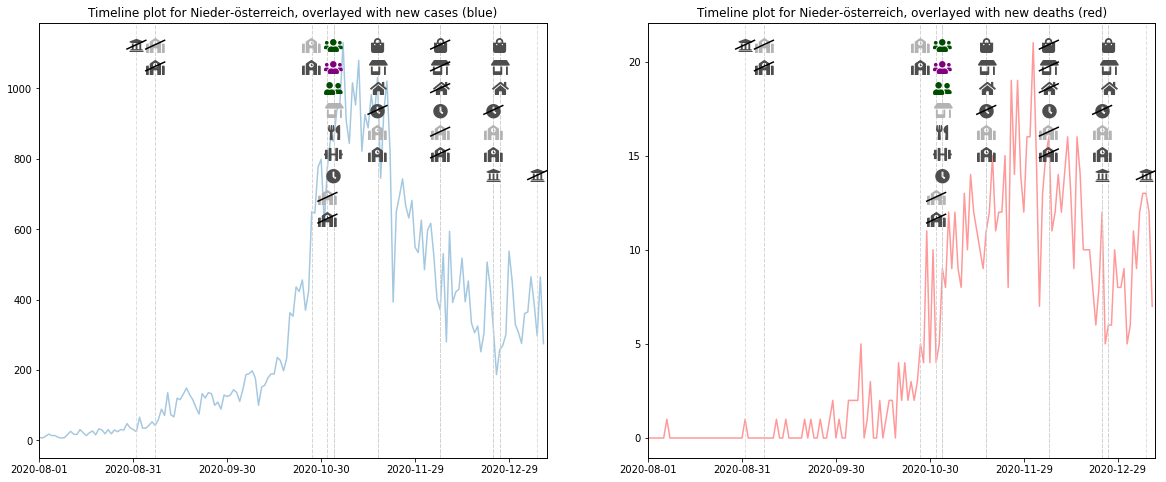

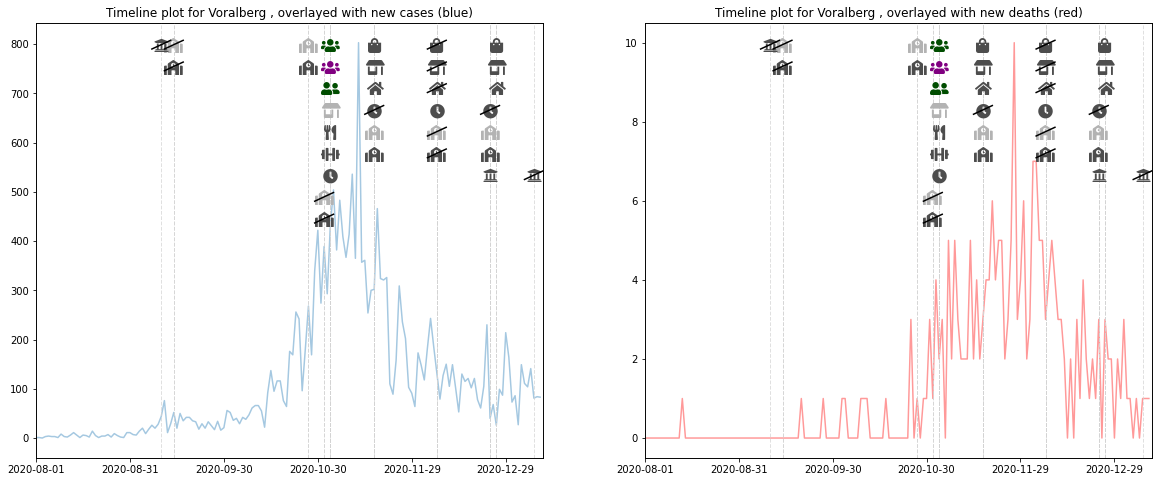

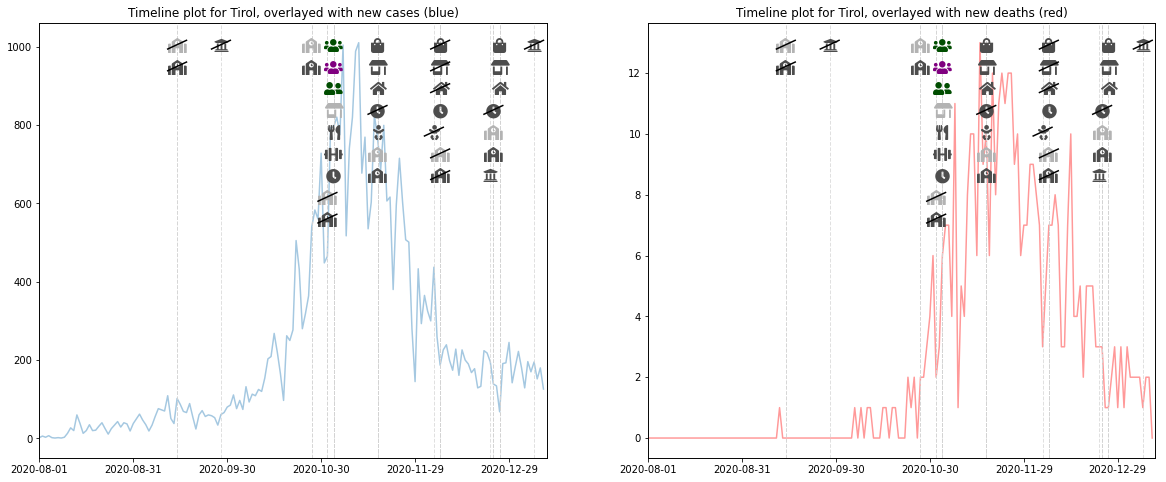

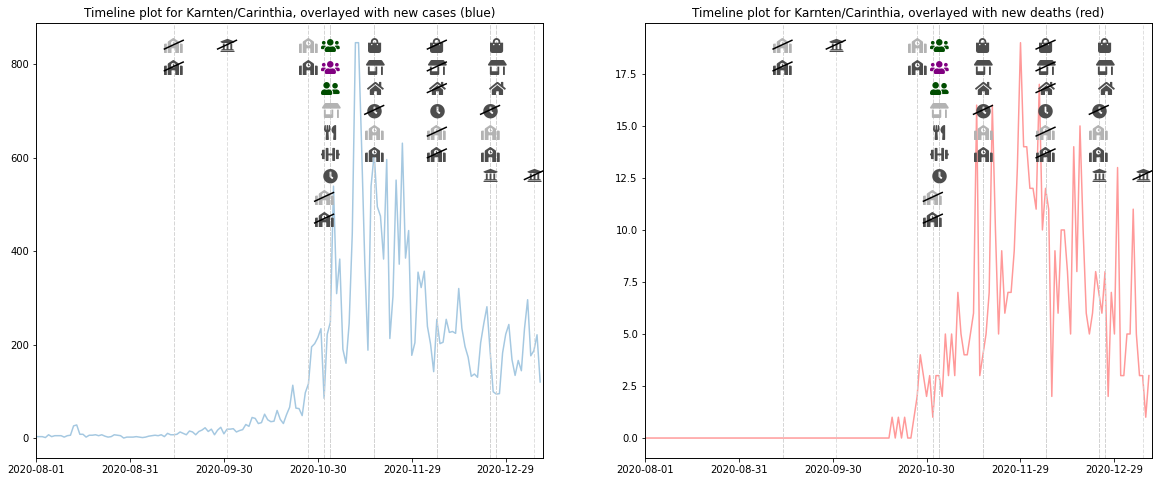

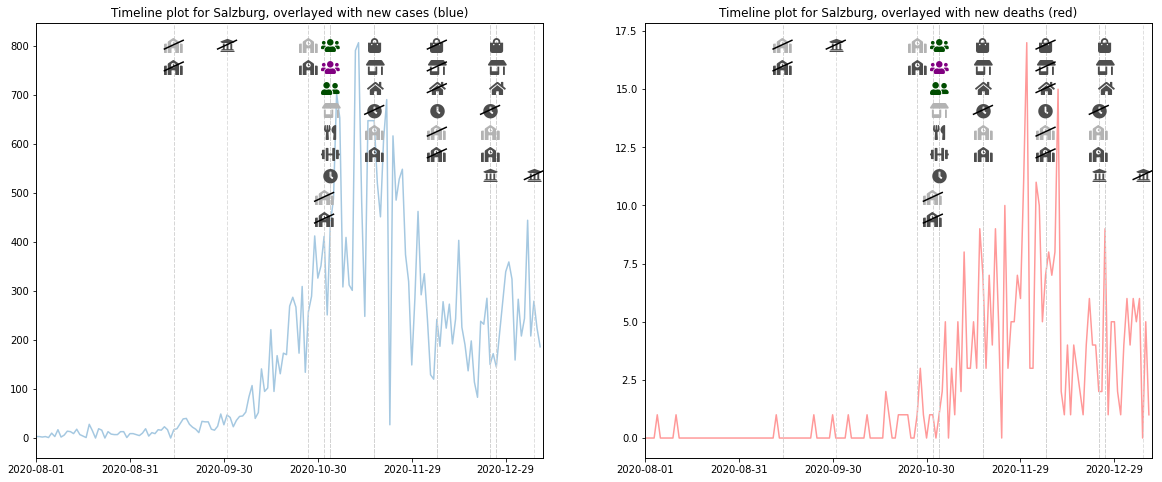

In [16]:
plot_timeline_country(1, at_Rs)

## Germany

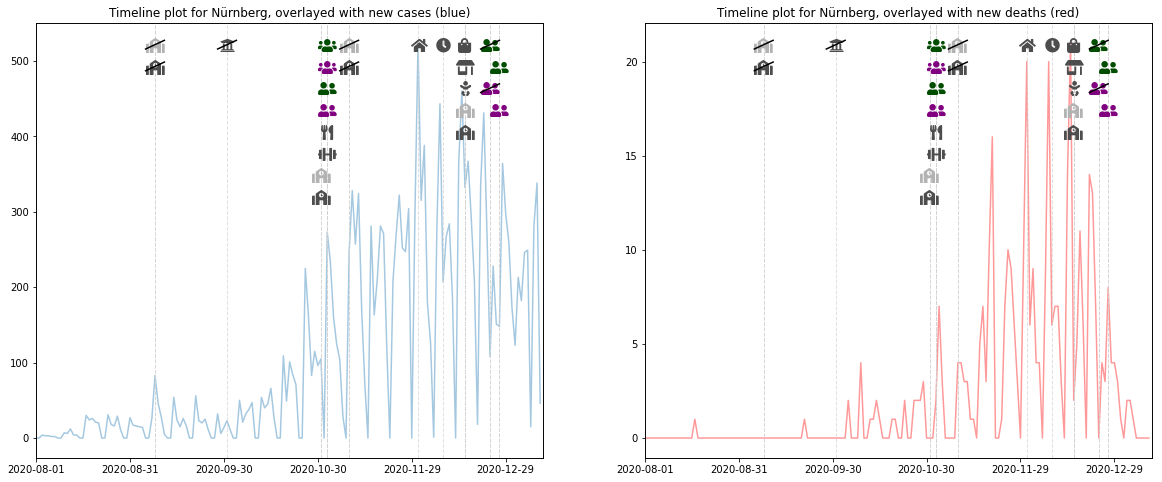

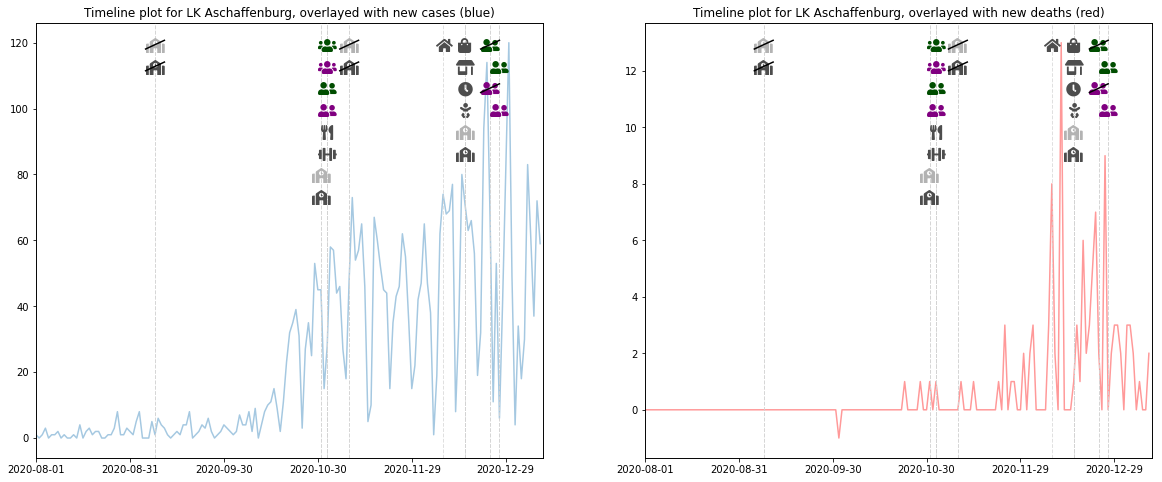

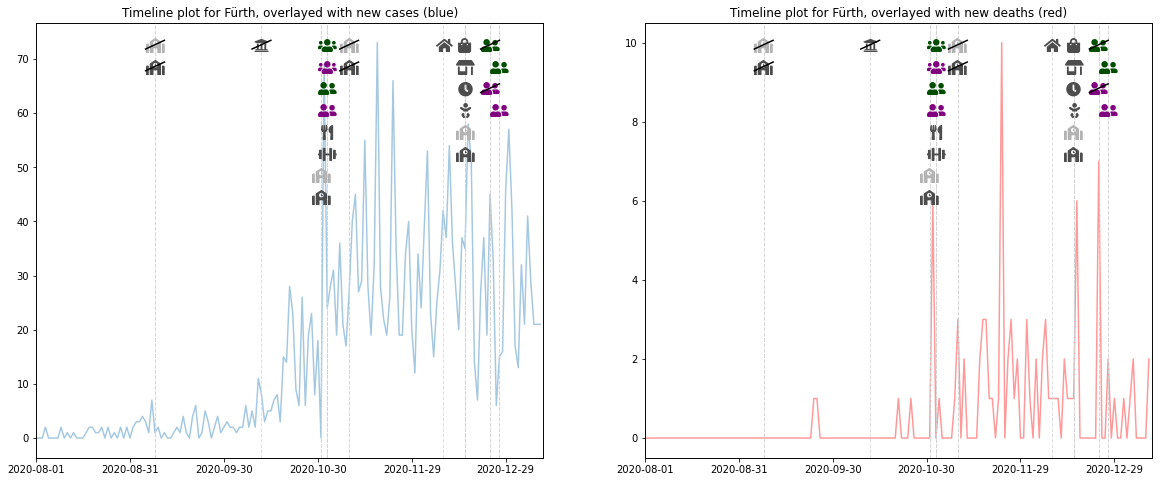

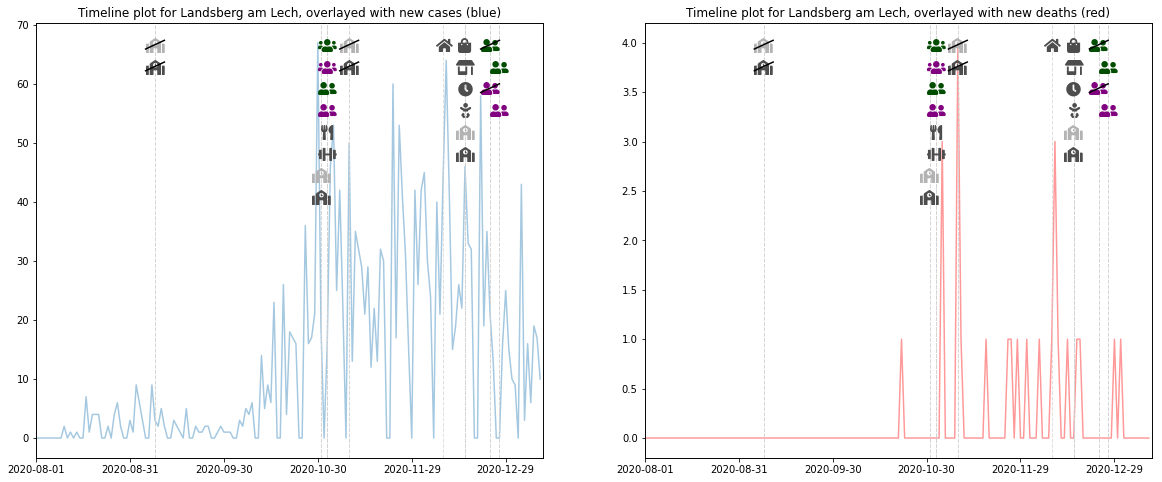

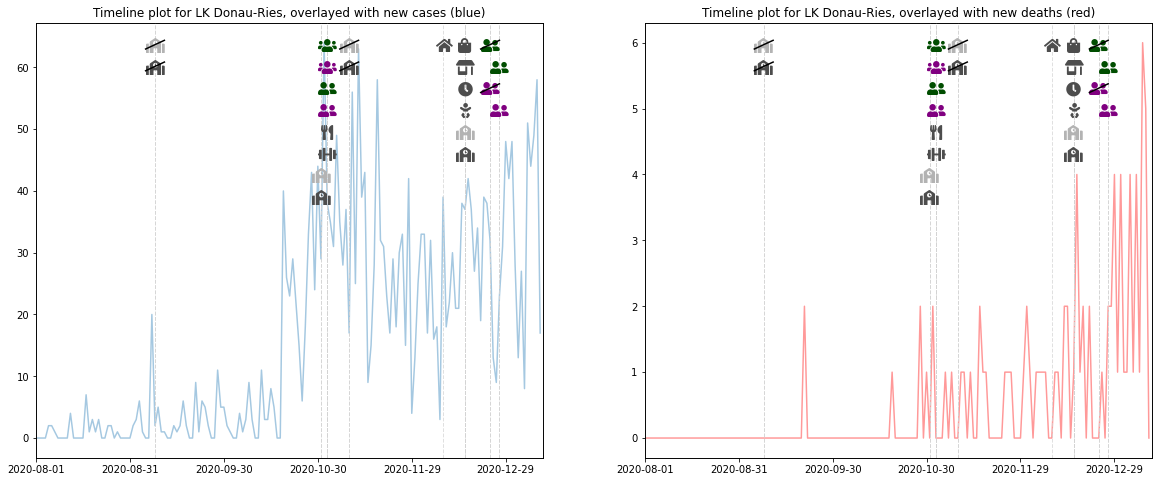

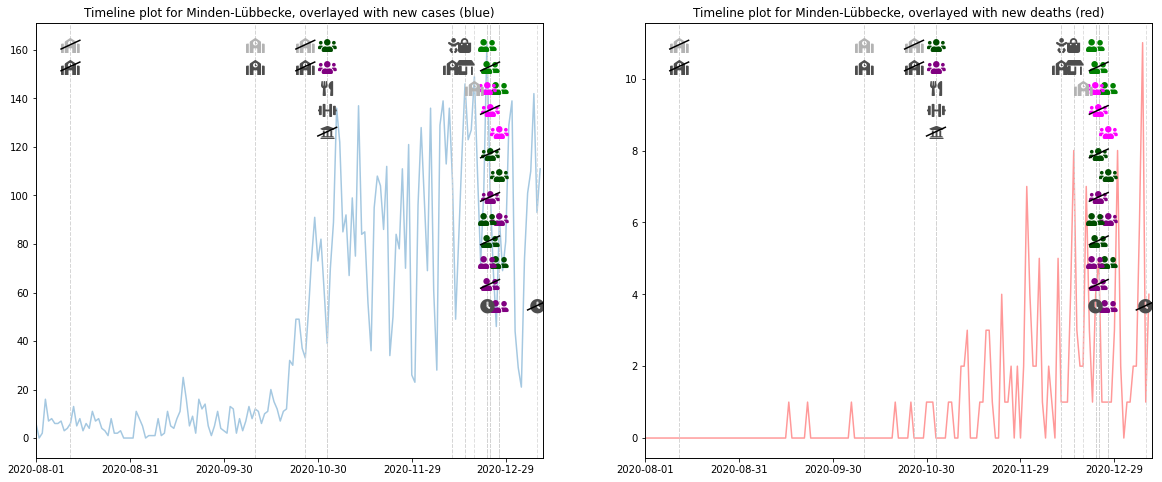

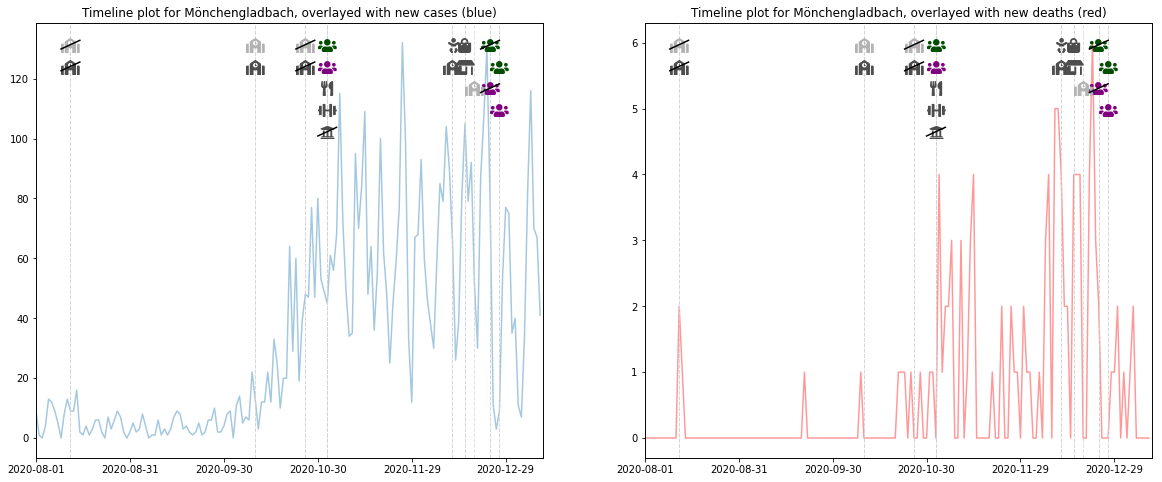

/home/charlie/.cache/pypoetry/virtualenvs/covid19npisecondwave-rNDyq_Fa-py3.8/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 57443 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/charlie/.cache/pypoetry/virtualenvs/covid19npisecondwave-rNDyq_Fa-py3.8/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 57443 missing from current font.
  font.set_text(s, 0, flags=flags)


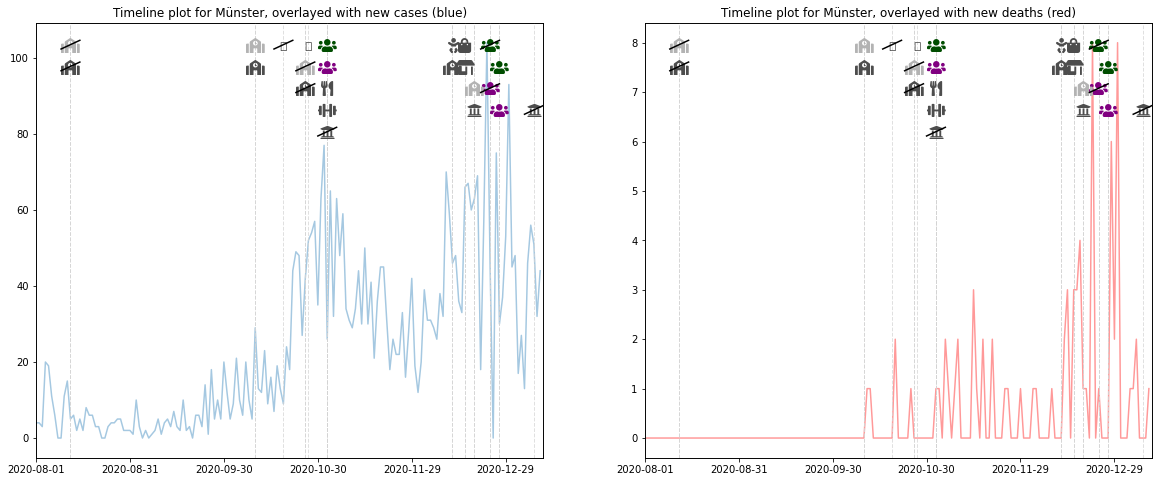

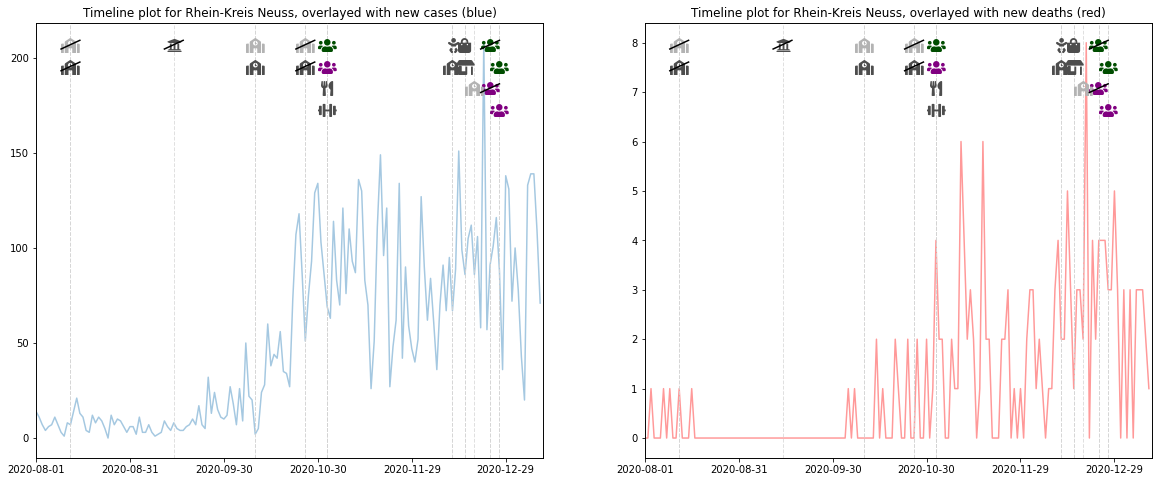

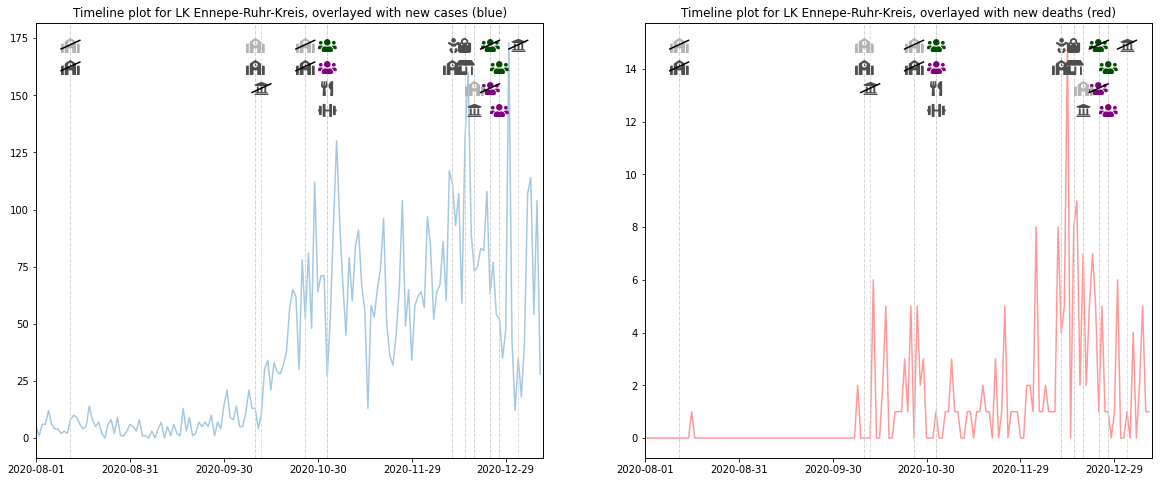

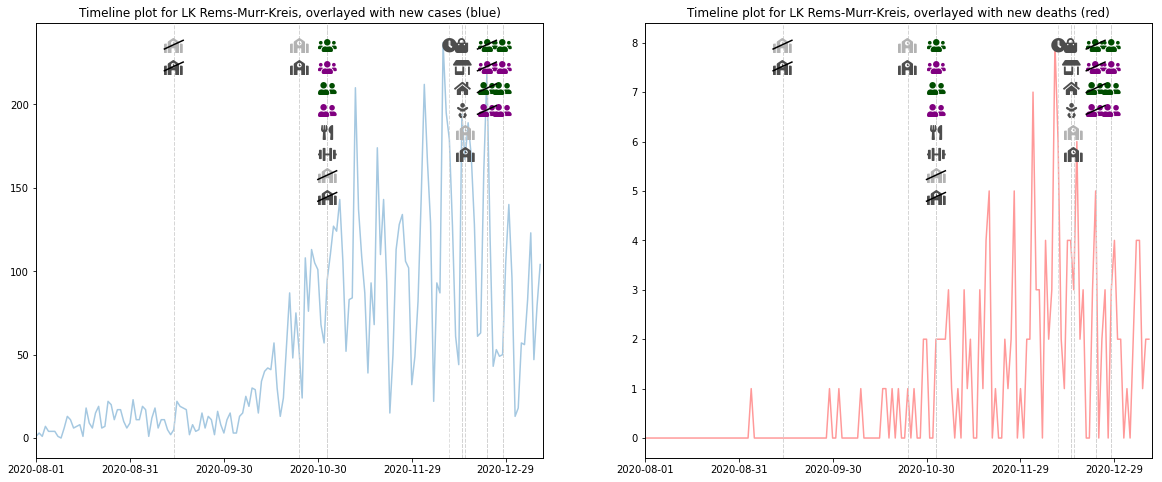

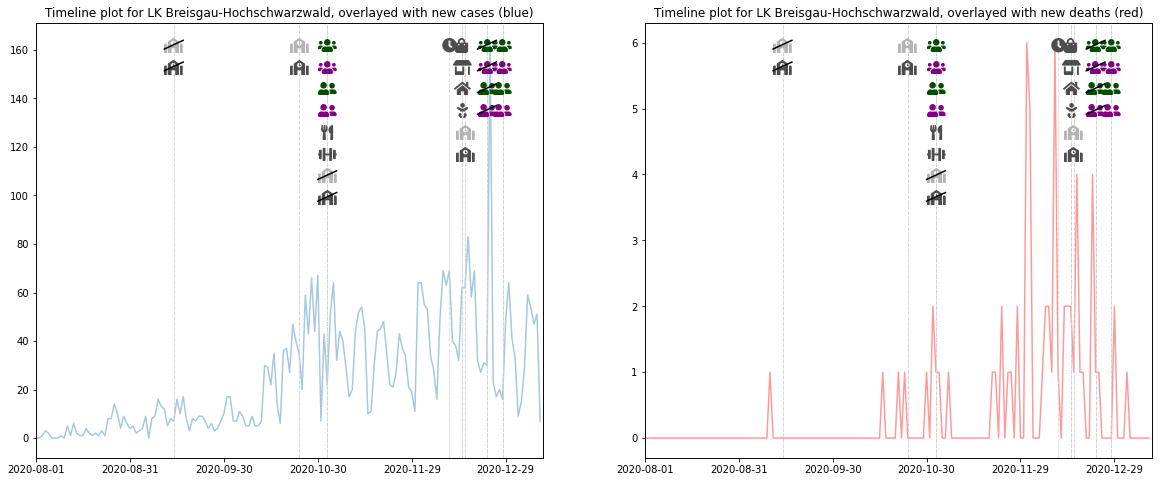

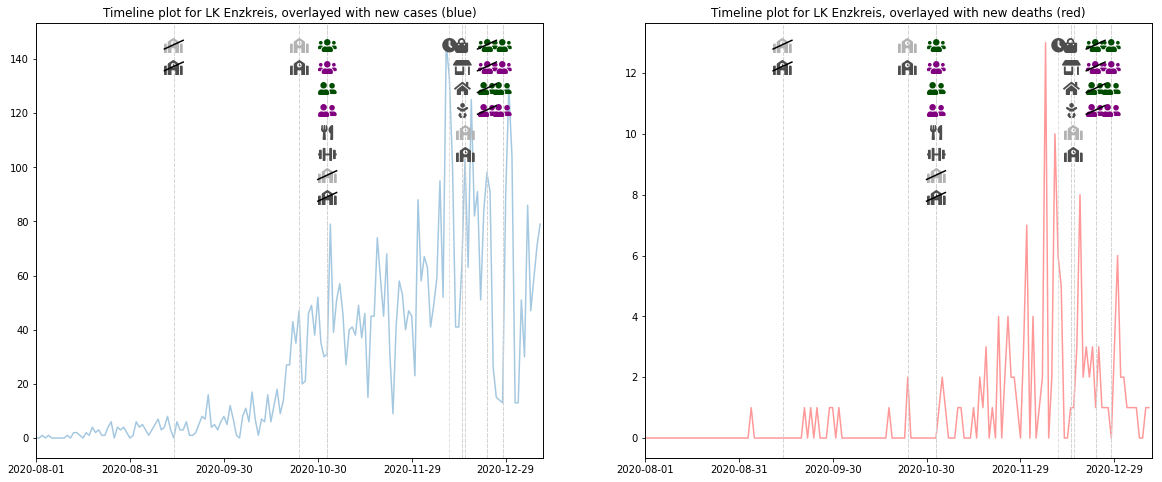

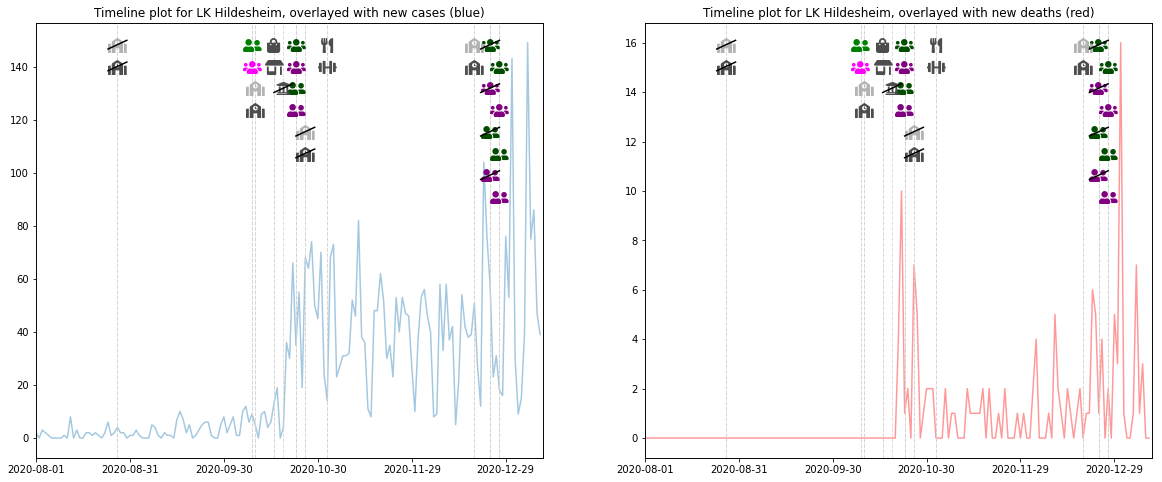

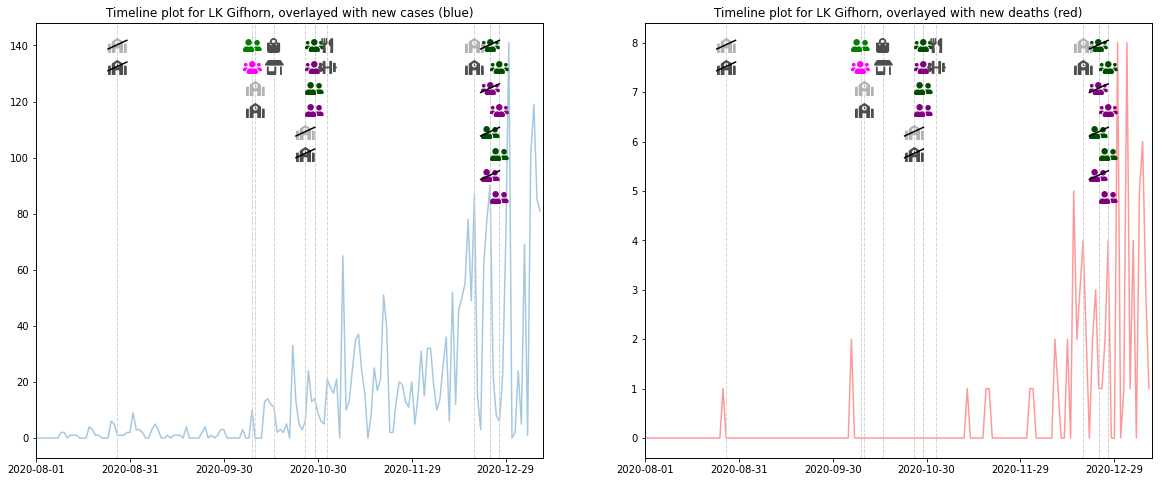

In [17]:
plot_timeline_country(2, de_Rs)

## Italy

<ipython-input-13-708c577d9fc5>:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=((20,8)))


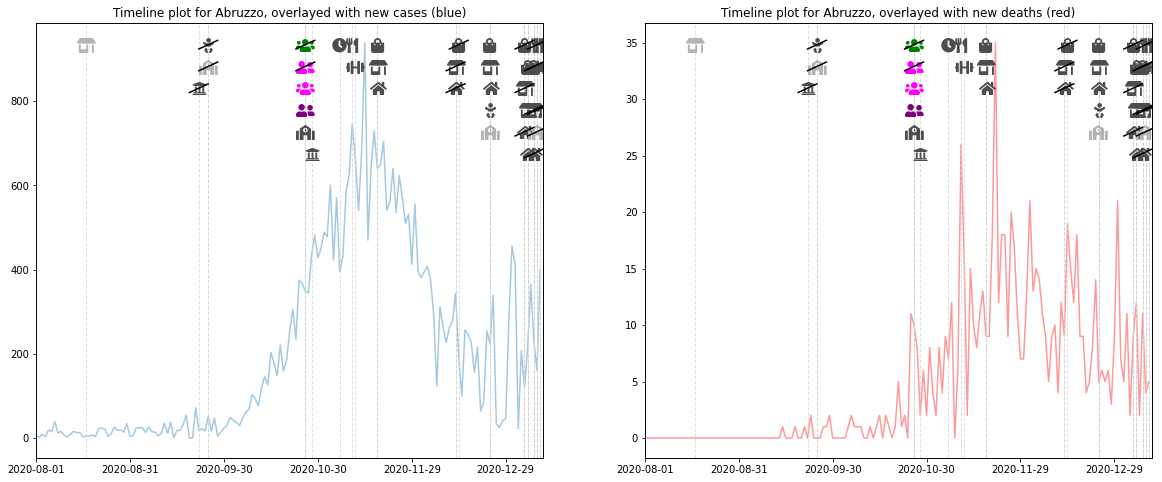

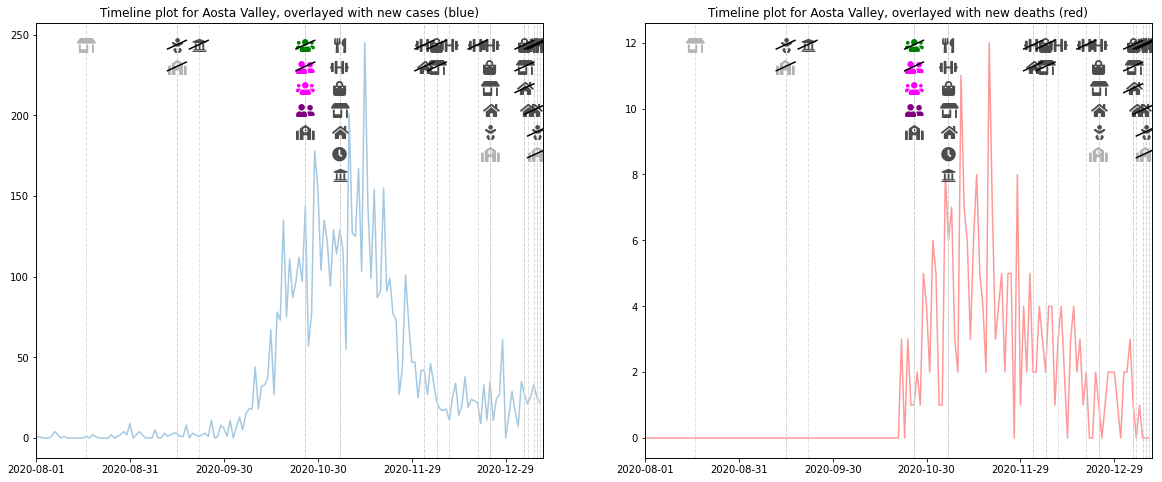

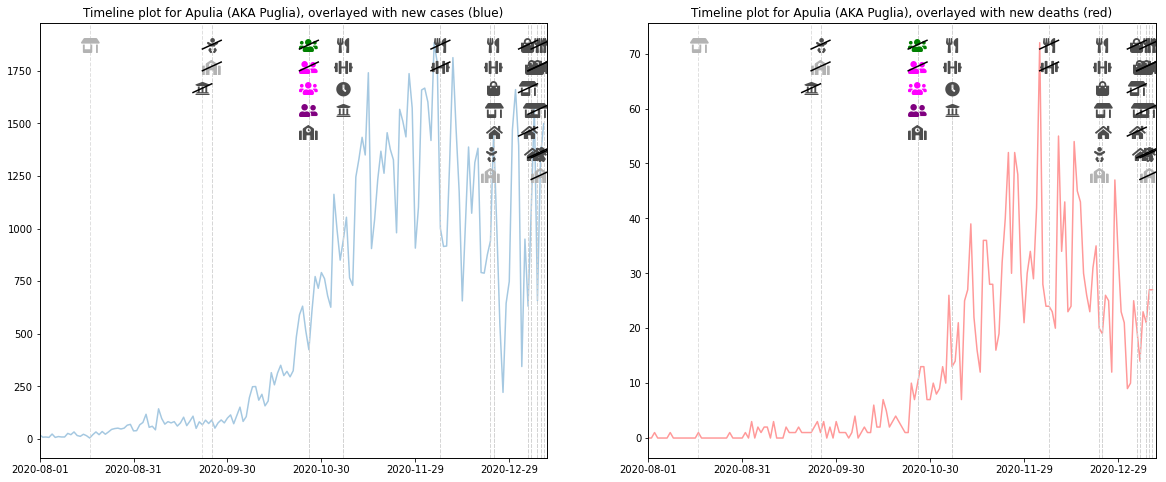

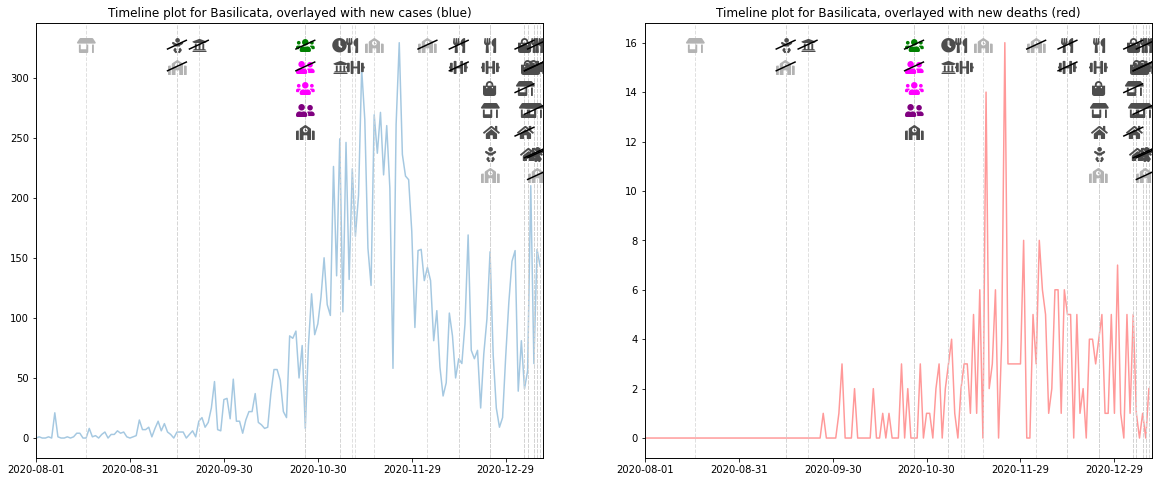

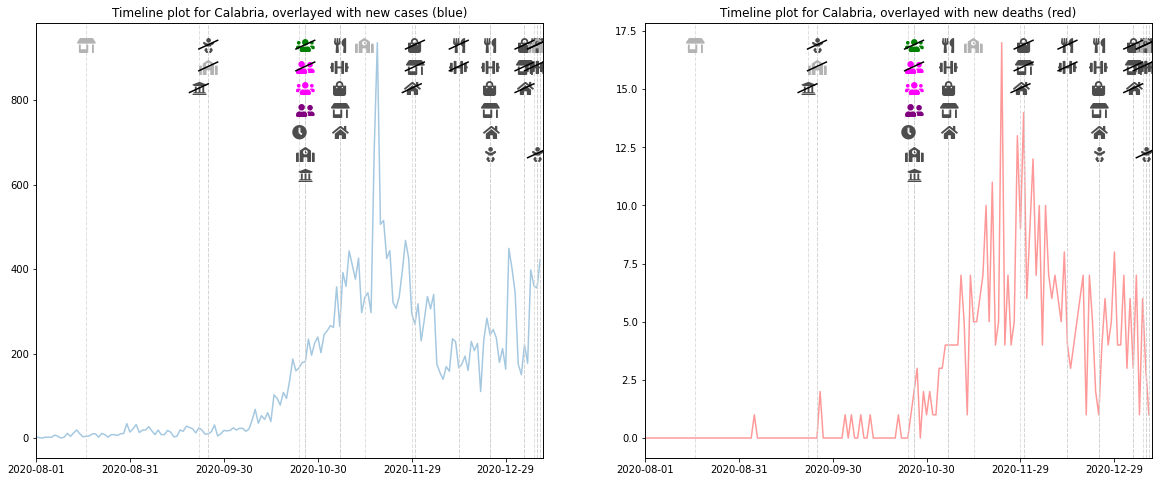

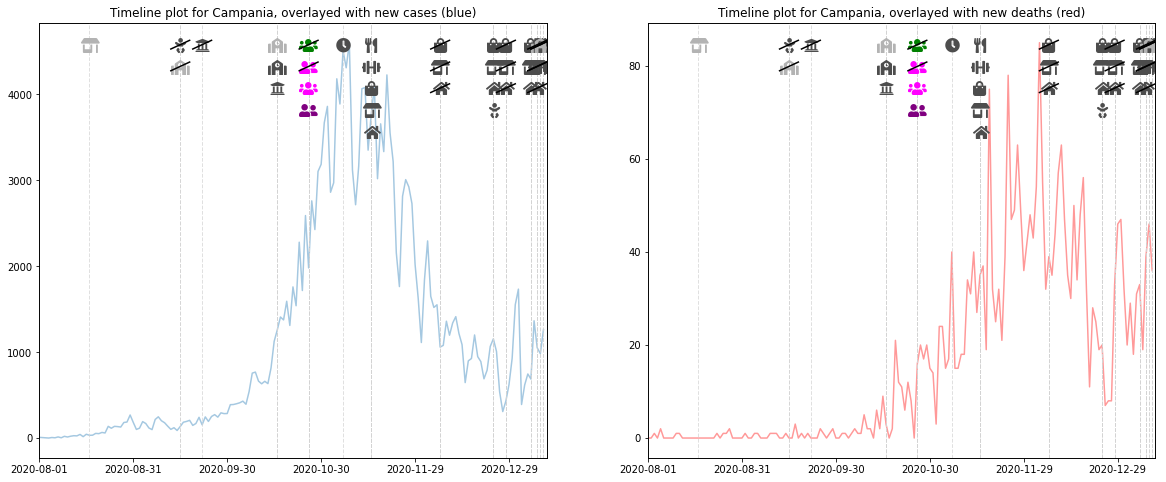

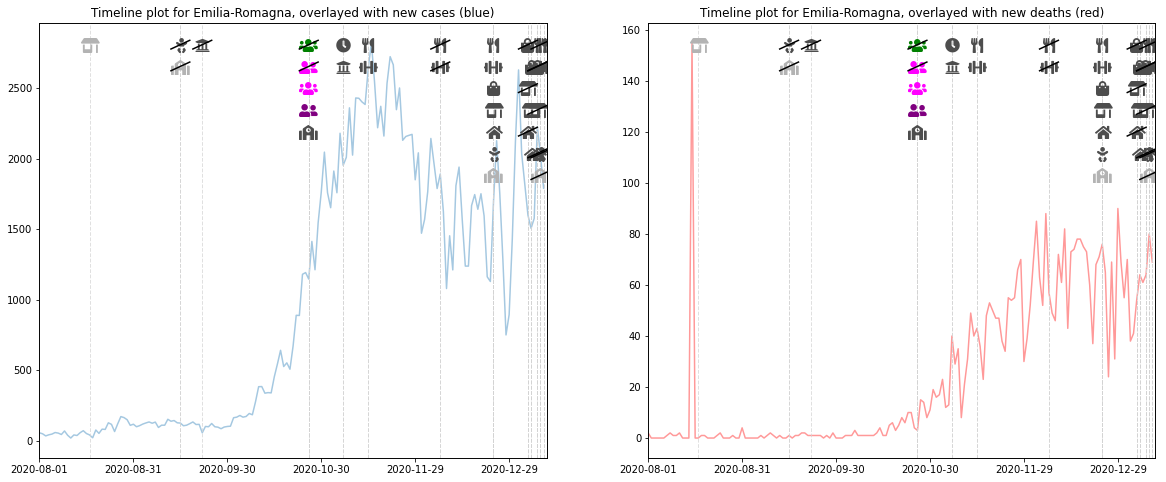

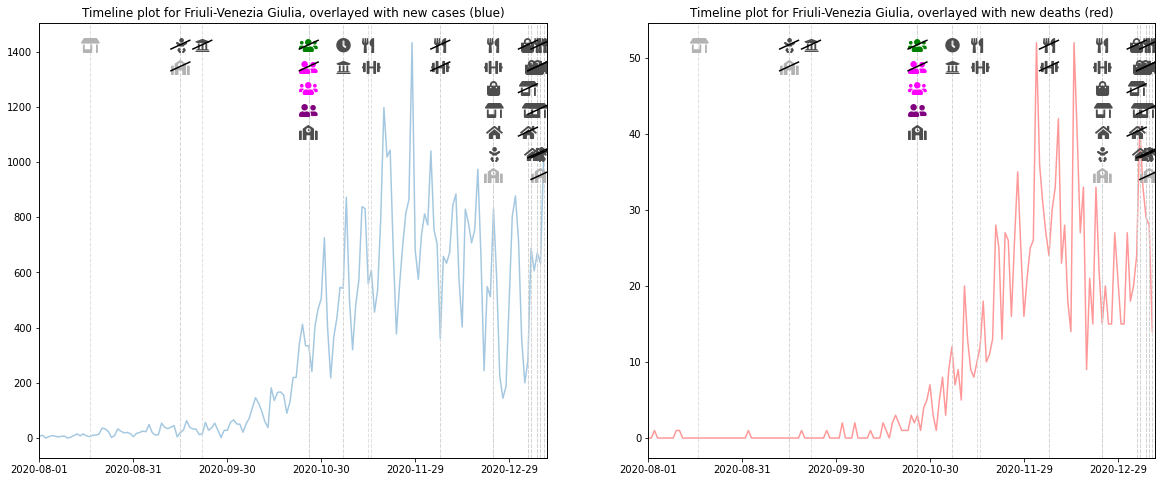

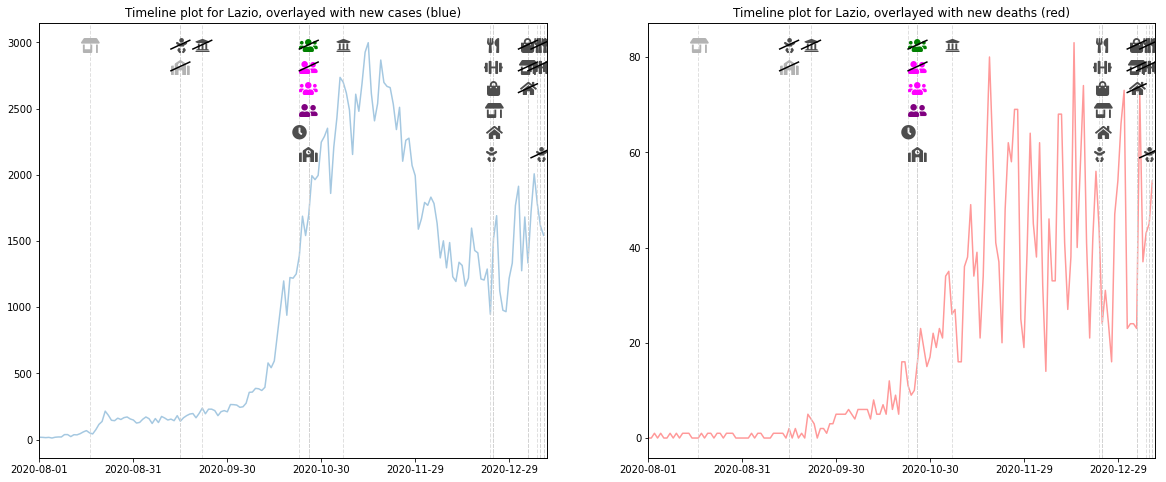

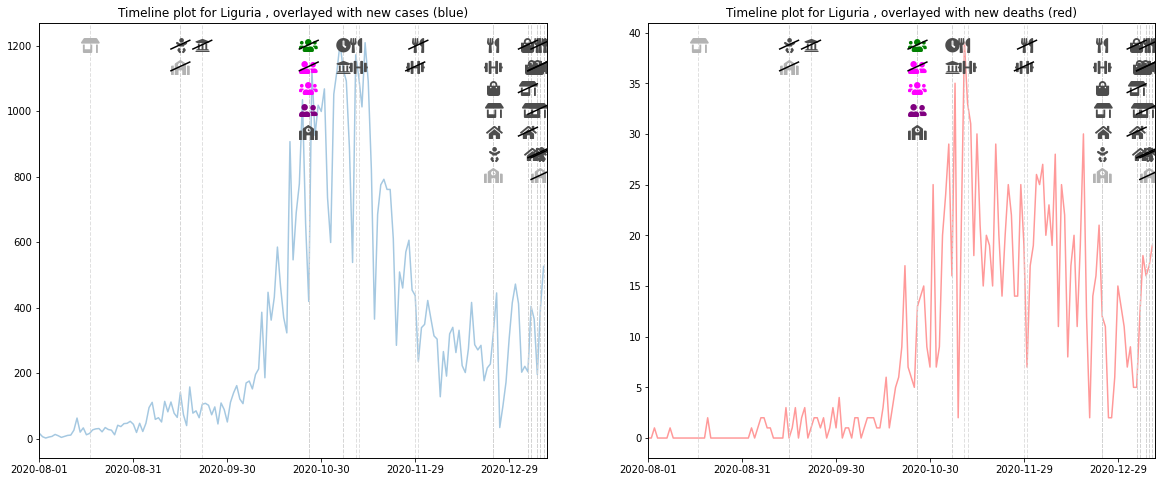

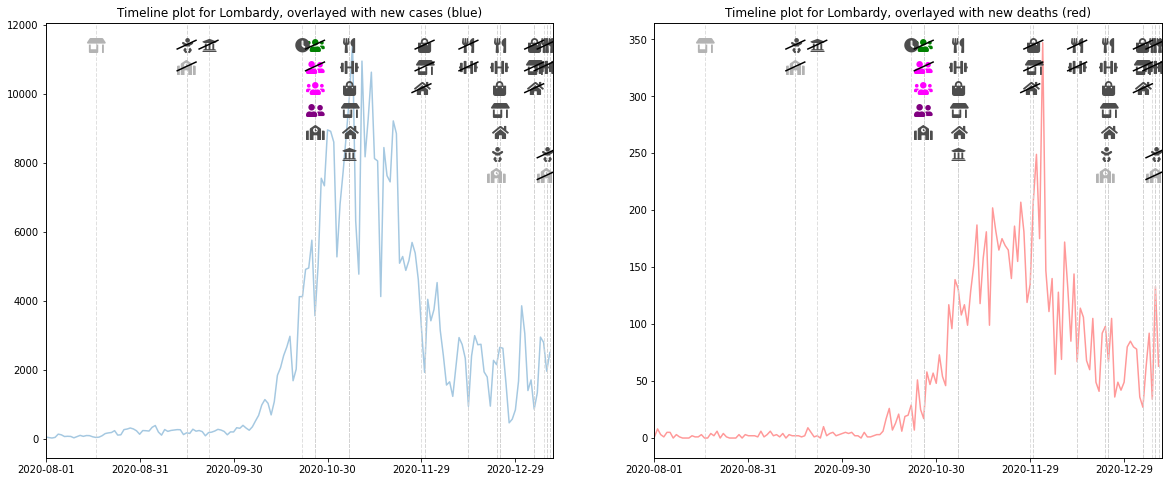

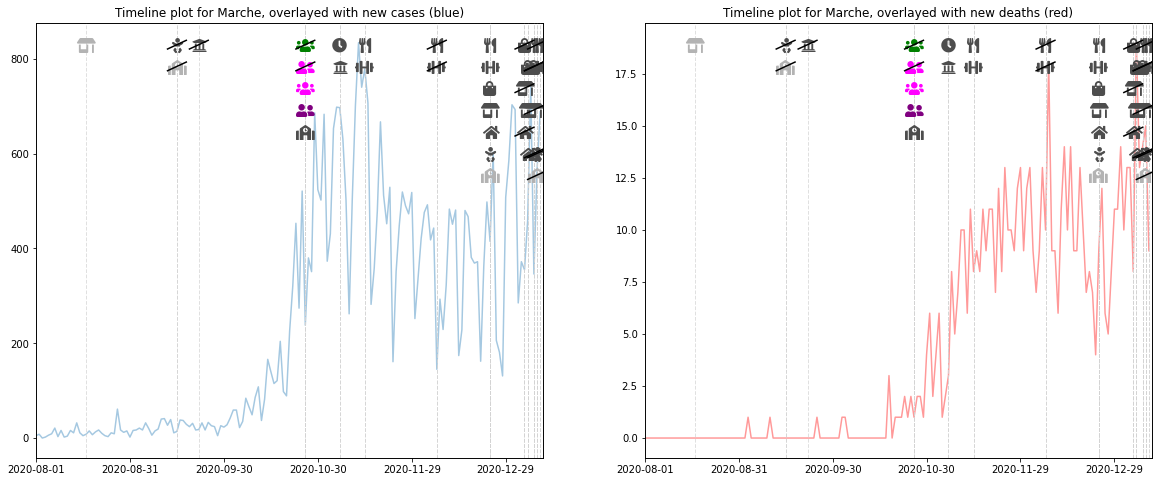

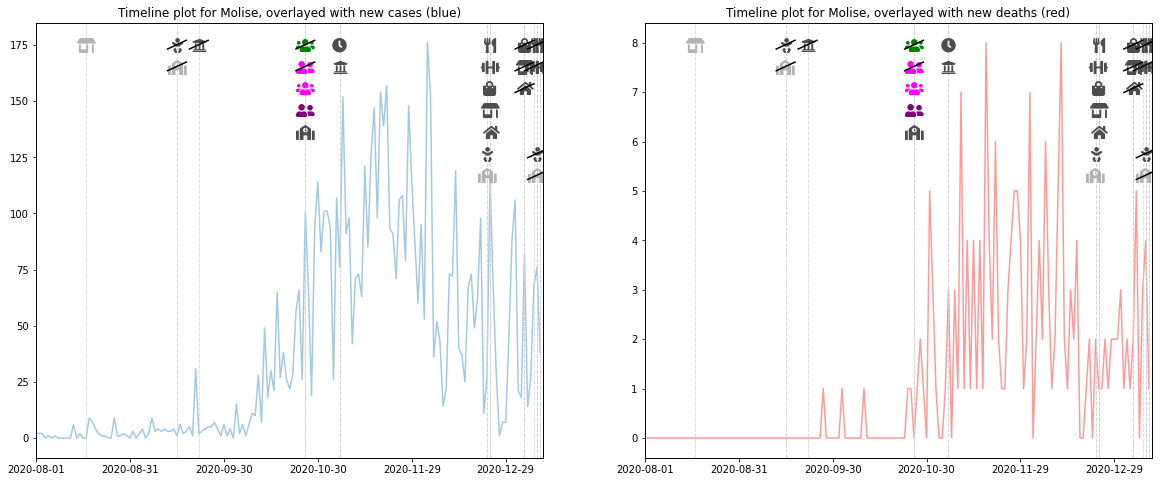

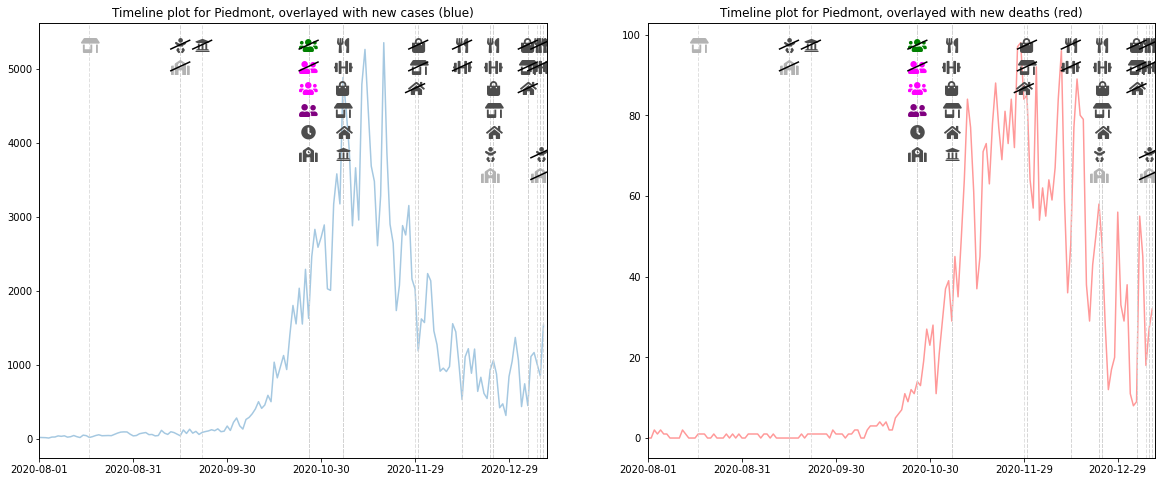

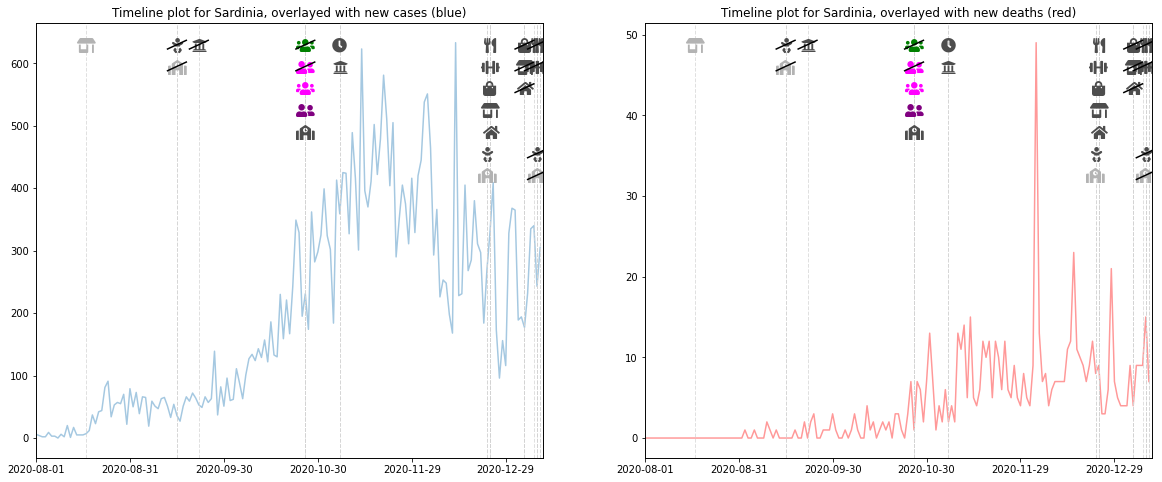

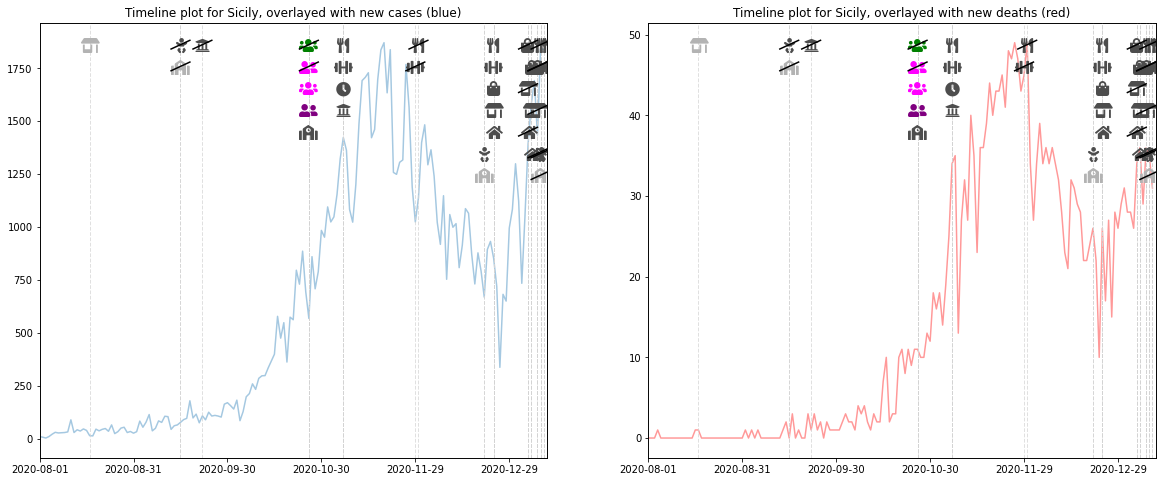

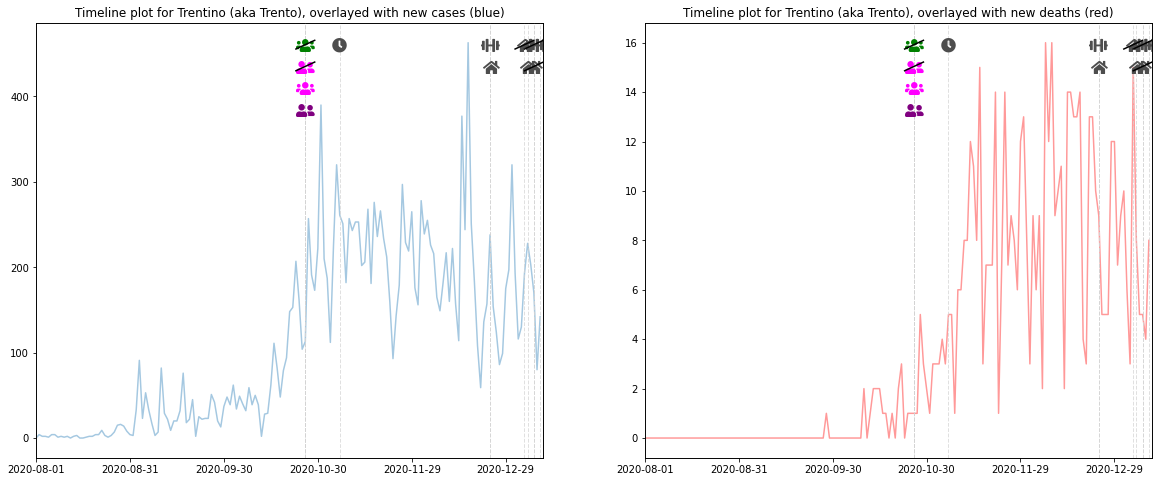

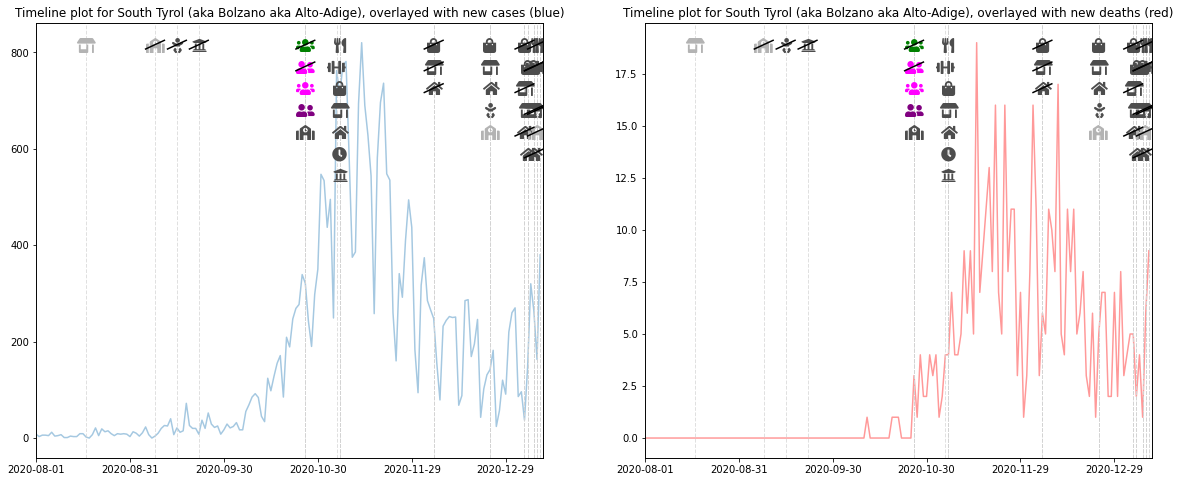

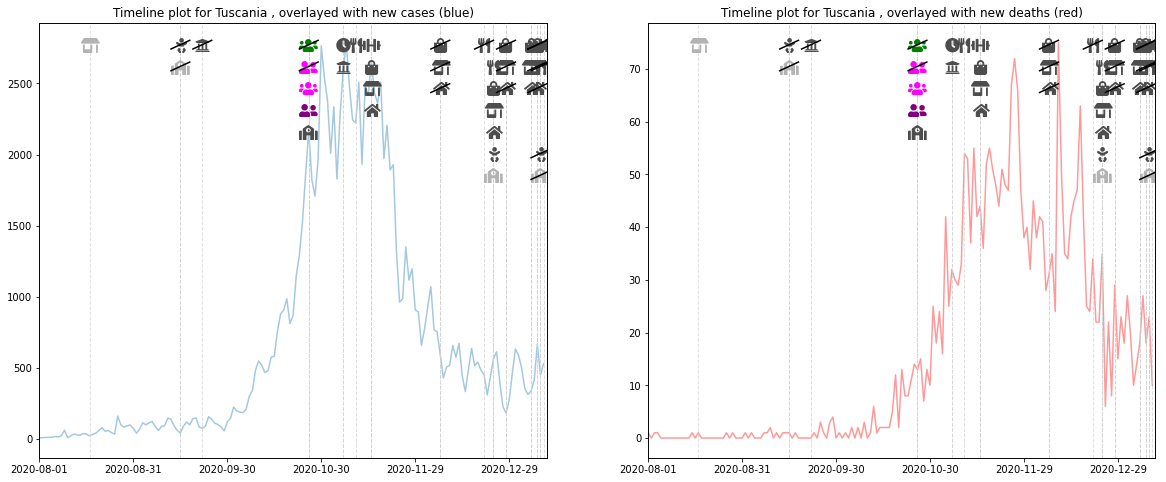

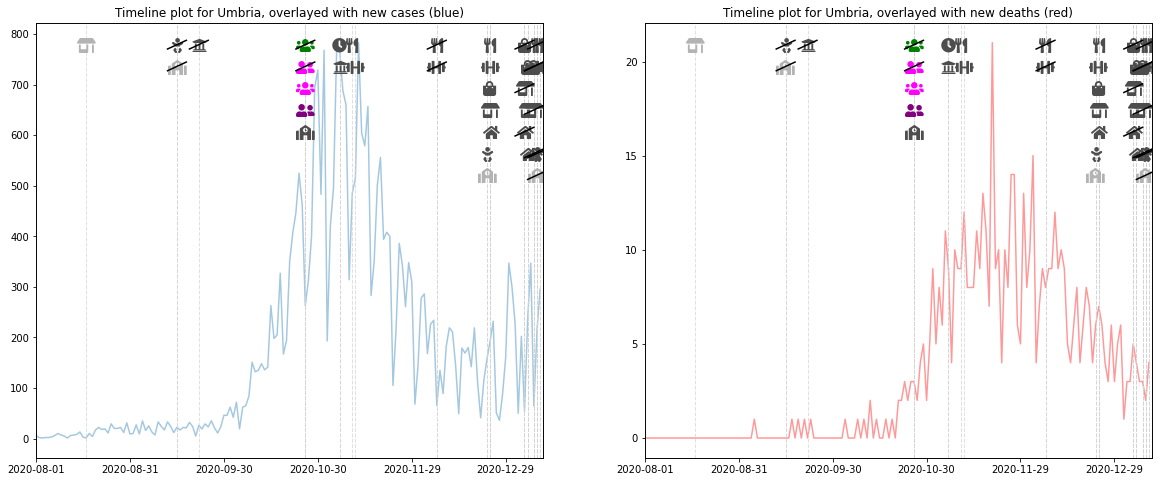

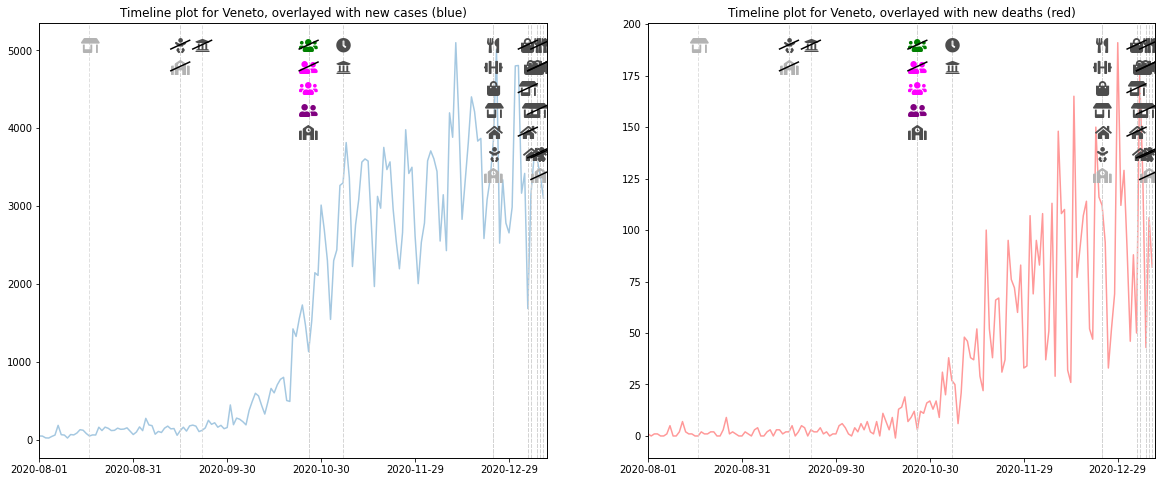

In [18]:
plot_timeline_country(3, it_Rs)